### Objective - 
Perform EDA on AMCAT Data
### Data Description - 
1. Employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations)  
2. Standardized scores from three different areas – cognitive skills, technical skills and personality skills.  
3. Demographic features.   
4. Around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature.  
5. A unique identifier for each candidate. 

In [173]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [174]:
df = pd.read_csv('AMCAT Data.csv')

In [175]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,536517,350000,8/1/2013 0:00,present,network engineer,-1,f,1/17/1990 0:00,69.54,...,-1,-1,-1,-1,-1,1.7465,1.9048,0.6720,-0.29020,1.2528
1,train,339689,200000,8/1/2012 0:00,12/1/2013 0:00,software engineer,-1,f,8/20/1991 0:00,75.67,...,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539
2,train,533417,200000,1/1/2013 0:00,6/1/2013 0:00,management trainee,-1,m,2/28/1991 0:00,88.00,...,-1,-1,-1,-1,-1,0.3941,1.2808,0.2366,-2.19980,-0.4455
3,train,754392,120000,7/1/2014 0:00,present,test engineer,-1,m,2/18/1992 0:00,76.00,...,-1,-1,-1,-1,-1,-0.1590,-0.2871,0.4711,0.27270,-0.4776
4,train,1089852,100000,8/1/2013 0:00,5/1/2014 0:00,software developer,-1,f,5/17/1992 0:00,86.00,...,-1,-1,-1,-1,-1,0.5591,-0.4536,0.0100,-0.48790,0.6721


In [176]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [177]:
# removing unnecessary 1st column
df = df.drop('Unnamed: 0',axis=1)

In [178]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,536517,350000,8/1/2013 0:00,present,network engineer,-1,f,1/17/1990 0:00,69.54,icse,...,-1,-1,-1,-1,-1,1.7465,1.9048,0.6720,-0.29020,1.2528
1,339689,200000,8/1/2012 0:00,12/1/2013 0:00,software engineer,-1,f,8/20/1991 0:00,75.67,up,...,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539
2,533417,200000,1/1/2013 0:00,6/1/2013 0:00,management trainee,-1,m,2/28/1991 0:00,88.00,kerala state technical education,...,-1,-1,-1,-1,-1,0.3941,1.2808,0.2366,-2.19980,-0.4455
3,754392,120000,7/1/2014 0:00,present,test engineer,-1,m,2/18/1992 0:00,76.00,state board,...,-1,-1,-1,-1,-1,-0.1590,-0.2871,0.4711,0.27270,-0.4776
4,1089852,100000,8/1/2013 0:00,5/1/2014 0:00,software developer,-1,f,5/17/1992 0:00,86.00,state board,...,-1,-1,-1,-1,-1,0.5591,-0.4536,0.0100,-0.48790,0.6721


In [179]:
df.columns = df.columns.str.lower()

In [180]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [181]:
df.shape

(3998, 38)

In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
collegeid,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
collegetier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegegpa,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
collegecityid,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
collegecitytier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [183]:
df.iloc[:,:19].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3998 non-null   int64  
 1   salary          3998 non-null   int64  
 2   doj             3998 non-null   object 
 3   dol             3998 non-null   object 
 4   designation     3998 non-null   object 
 5   jobcity         3998 non-null   object 
 6   gender          3998 non-null   object 
 7   dob             3998 non-null   object 
 8   10percentage    3998 non-null   float64
 9   10board         3998 non-null   object 
 10  12graduation    3998 non-null   int64  
 11  12percentage    3998 non-null   float64
 12  12board         3998 non-null   object 
 13  collegeid       3998 non-null   int64  
 14  collegetier     3998 non-null   int64  
 15  degree          3998 non-null   object 
 16  specialization  3998 non-null   object 
 17  collegegpa      3998 non-null   f

In [184]:
df.iloc[:,18:].info()  # info for remaining columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   collegecityid          3998 non-null   int64  
 1   collegecitytier        3998 non-null   int64  
 2   collegestate           3998 non-null   object 
 3   graduationyear         3998 non-null   int64  
 4   english                3998 non-null   int64  
 5   logical                3998 non-null   int64  
 6   quant                  3998 non-null   int64  
 7   domain                 3998 non-null   float64
 8   computerprogramming    3998 non-null   int64  
 9   electronicsandsemicon  3998 non-null   int64  
 10  computerscience        3998 non-null   int64  
 11  mechanicalengg         3998 non-null   int64  
 12  electricalengg         3998 non-null   int64  
 13  telecomengg            3998 non-null   int64  
 14  civilengg              3998 non-null   int64  
 15  cons

In [185]:
# Changing datatype
df['doj'] = pd.to_datetime(df['doj'])
# df['dol'] = pd.to_datetime(df['dol']) # can't change dol column since it contains text "present"
df['dob'] = pd.to_datetime(df['dob'])

In [186]:
df.iloc[:,:19].info() # verifying changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3998 non-null   int64         
 1   salary          3998 non-null   int64         
 2   doj             3998 non-null   datetime64[ns]
 3   dol             3998 non-null   object        
 4   designation     3998 non-null   object        
 5   jobcity         3998 non-null   object        
 6   gender          3998 non-null   object        
 7   dob             3998 non-null   datetime64[ns]
 8   10percentage    3998 non-null   float64       
 9   10board         3998 non-null   object        
 10  12graduation    3998 non-null   int64         
 11  12percentage    3998 non-null   float64       
 12  12board         3998 non-null   object        
 13  collegeid       3998 non-null   int64         
 14  collegetier     3998 non-null   int64         
 15  degr

### Cleaning designation column

In [187]:
df['designation'] = df['designation'].str.strip().str.lower()
unq_designation = df['designation'].unique()
unq_designation.sort()
len(unq_designation) 

419

In [188]:
unq_designation

array(['.net developer', '.net web developer', 'account executive',
       'account manager', 'admin assistant', 'administrative coordinator',
       'administrative support', 'aircraft technician',
       'android developer', 'application developer',
       'application engineer', 'apprentice', 'ase', 'asp.net developer',
       'assistant administrator', 'assistant electrical engineer',
       'assistant engineer', 'assistant manager', 'assistant professor',
       'assistant programmer', 'assistant software engineer',
       'assistant store manager', 'assistant system engineer',
       'assistant system engineer - trainee',
       'assistant system engineer trainee', 'assistant systems engineer',
       'associate developer', 'associate engineer', 'associate manager',
       'associate qa', 'associate software developer',
       'associate software engg', 'associate software engineer',
       'associate system engineer', 'associate technical operations',
       'associate test engi

In [189]:
unq_designation_dict = {}
for ele in unq_designation:
       unq_designation_dict[ele] = ele

In [190]:
# finding inconsistencies & changing 
unq_designation_dict['assistant system engineer - trainee'] = 'trainee assistant system engineer'
unq_designation_dict['assistant systems engineer'] = 'assistant system engineer'
unq_designation_dict['associate software engg'] ='associate software engineer'
unq_designation_dict['asst. manager'] ='assistant manager'
unq_designation_dict['business development managerde'] ='business development manager'
unq_designation_dict['business systems analyst'] ='business system analyst'
unq_designation_dict['dotnet developer'] ='.net developer'
unq_designation_dict['executive engg'] ='executive engineer'
unq_designation_dict['graduate trainee engineer'] ='trainee graduate engineer'
unq_designation_dict['software test engineerte'] ='software test engineer'
unq_designation_dict['software engineering associate'] ='associate software engineer'
unq_designation_dict['r & d'] ='r&d'
unq_designation_dict['front end developer'] ='front end web developer'
unq_designation_dict['sap abap associate consultant'] ='associate sap abap consultant'
unq_designation_dict['software trainee engineer'] ='trainee software engineer'
unq_designation_dict['software engineere'] = 'software engineer'




df['designation'] = df['designation'].replace(unq_designation_dict)

In [191]:
def subsFunc(row):
    row = row.replace('hr ','human resource ')
    row = row.replace(' hr',' human resource')
    row = row.replace(' it ',' information technology ')
    row = row.replace('jr. ','junior ')
    row = row.replace('sr. ','senior ')
    row = row.replace('leader','lead')
    row = row.replace('dotnet','.net')
    row = row.replace('systems ','system ')
    row = row.replace(' systems',' system')
    row = row.replace('engg ','engineer ')
    row = row.replace('eng ','engineer ')
    row = row.replace('devloper ','developer ')
    row = row.replace('engeering ','engineer ')
    row = row.replace('testing ','test ')
    row = row.replace('telecom ','telecommunication ')
    row = row.replace('web ','website ')
    row = row.replace('-',' ')
    if row[-9:] == 'associate':
        row = 'associate '+row[:-9] 
        row = row.strip()
    if row[-9:] == 'assistant':
        row = 'assistant '+row[:-9] 
        row = row.strip()
    return row
    if row[-7:] == 'trainee':
        row = 'trainee '+row[:-7] 
        row = row.strip()
    return row
df['designation'] = df['designation'].apply(subsFunc)

In [192]:
len(df['designation'].unique())

396

### Cleaning JobCity Column

In [193]:
df['jobcity'] = df['jobcity'].str.strip().str.lower()
unq_job_city = df['jobcity'].unique()
unq_job_city.sort()
len(unq_job_city) 

232

In [194]:
unq_job_city

array(['-1', 'a-64,sec-64,noida', 'agra', 'ahmedabad', 'ahmednagar',
       'al jubail,saudi arabia', 'allahabad', 'alwar', 'am', 'ambala',
       'ambala city', 'angul', 'ariyalur', 'asansol', 'asifabadbanglore',
       'aurangabad', 'australia', 'baddi hp', 'bahadurgarh', 'banagalore',
       'banaglore', 'bangalore', 'banglore', 'bankura', 'bareli',
       'baripada', 'baroda', 'bathinda', 'beawar', 'belgaum', 'bellary',
       'bengaluru', 'bhagalpur', 'bharuch', 'bhilai', 'bhiwadi', 'bhopal',
       'bhubaneshwar', 'bhubaneswar', 'bhubneshwar', 'bihar', 'bikaner',
       'bilaspur', 'bulandshahar', 'bundi', 'burdwan', 'calicut',
       'chandigarh', 'chandrapur', 'chennai', 'chennai & mumbai',
       'chennai, bangalore', 'cheyyar', 'coimbatore', 'daman and diu',
       'dammam', 'dausa', 'dehradun', 'delhi', 'delhi/ncr', 'dhanbad',
       'dharamshala', 'dharmapuri', 'dharuhera', 'dubai', 'durgapur',
       'ernakulam', 'faridabad', 'gagret', 'gajiabaad', 'gandhi nagar',
       '

In [195]:
unq_job_city_dict = {}
for ele in unq_job_city:
       unq_job_city_dict[ele] = ele

In [196]:
unq_job_city_dict

{'-1': '-1',
 'a-64,sec-64,noida': 'a-64,sec-64,noida',
 'agra': 'agra',
 'ahmedabad': 'ahmedabad',
 'ahmednagar': 'ahmednagar',
 'al jubail,saudi arabia': 'al jubail,saudi arabia',
 'allahabad': 'allahabad',
 'alwar': 'alwar',
 'am': 'am',
 'ambala': 'ambala',
 'ambala city': 'ambala city',
 'angul': 'angul',
 'ariyalur': 'ariyalur',
 'asansol': 'asansol',
 'asifabadbanglore': 'asifabadbanglore',
 'aurangabad': 'aurangabad',
 'australia': 'australia',
 'baddi hp': 'baddi hp',
 'bahadurgarh': 'bahadurgarh',
 'banagalore': 'banagalore',
 'banaglore': 'banaglore',
 'bangalore': 'bangalore',
 'banglore': 'banglore',
 'bankura': 'bankura',
 'bareli': 'bareli',
 'baripada': 'baripada',
 'baroda': 'baroda',
 'bathinda': 'bathinda',
 'beawar': 'beawar',
 'belgaum': 'belgaum',
 'bellary': 'bellary',
 'bengaluru': 'bengaluru',
 'bhagalpur': 'bhagalpur',
 'bharuch': 'bharuch',
 'bhilai': 'bhilai',
 'bhiwadi': 'bhiwadi',
 'bhopal': 'bhopal',
 'bhubaneshwar': 'bhubaneshwar',
 'bhubaneswar': 'bhuba

In [197]:
unq_job_city_dict['a-64,sec-64,noida'] = 'noida'
unq_job_city_dict['al jubail,saudi arabia'] = 'al jubail'
unq_job_city_dict['asifabadbanglore'] = 'bengaluru'
unq_job_city_dict['australia'] = 'unknown'
unq_job_city_dict['baddi hp'] = 'baddi'
unq_job_city_dict['banagalore'] = 'bengaluru'
unq_job_city_dict['banaglore'] = 'bengaluru'
unq_job_city_dict['bangalore'] = 'bengaluru'
unq_job_city_dict['banglore'] = 'bengaluru'

unq_job_city_dict['bhubaneshwar'] = 'bhubaneswar'
unq_job_city_dict['bhubneshwar'] = 'bhubaneswar'
unq_job_city_dict['calicut'] = 'kozhikode'
unq_job_city_dict['dubai'] = 'unknown'
unq_job_city_dict['delhi'] = 'new delhi'
unq_job_city_dict['delhi/ncr'] = 'ncr'
unq_job_city_dict['delhi&ncr'] = 'ncr'
unq_job_city_dict['indirapuram&ghaziabad'] = 'indirapuram & ghaziabad'

unq_job_city_dict['gaziabaad'] = 'ghaziabad'
unq_job_city_dict['guragaon'] = 'gurugram'
unq_job_city_dict['gurgaon'] = 'gurugram'
unq_job_city_dict['guragaon'] = 'gurugram'
unq_job_city_dict['hderabad'] = 'hyderabad'
unq_job_city_dict['hyderabad(bhadurpally)'] = 'hyderabad'
unq_job_city_dict['india'] = 'unknown'
unq_job_city_dict['jeddah saudi arabia'] = 'jeddah'
unq_job_city_dict['kalmar, sweden'] = 'kalmar'
unq_job_city_dict['kolkata`'] = 'kolkata'
unq_job_city_dict['mettur, tamil nadu'] = 'mettur'
unq_job_city_dict['tirupathi'] = 'tirupati'
unq_job_city_dict['vsakhapttnam'] = 'visakhapatnam'
unq_job_city_dict['chennai& bangalore'] = 'chennai & bangalore'
unq_job_city_dict['kochi&cochin'] = 'kochi'
unq_job_city_dict['kochi&cochin& chennai and coimbatore'] = 'kochi & chennai & coimbatore'
unq_job_city_dict['kudankulam &tarapur'] = 'kudankulam & tarapur'
unq_job_city_dict['muzzafarpur']='muzaffarpur'
unq_job_city_dict['nasikcity']='nashik'
unq_job_city_dict['new dehli']='new delhi'
unq_job_city_dict['nouda']='noida'
unq_job_city_dict['pondicherry']='puducherry'
unq_job_city_dict['pondi']='puducherry'
unq_job_city_dict['pondy']='puducherry'
unq_job_city_dict['punr']='pune'
unq_job_city_dict['rayagada&odisha']='rayagada'
unq_job_city_dict['latur (maharashtra )'] = 'latur'
unq_job_city_dict['sadulpur&rajgarh&distt&churu&rajasthan'] ='sadulpur & rajgarh & churu'
unq_job_city_dict['sonepat']='sonipat'
unq_job_city_dict['technopark& trivandrum'] = 'thiruvananthapuram'
unq_job_city_dict['trivandrum'] = 'thiruvananthapuram'
unq_job_city_dict['tirunelvelli']='tirunelveli'
unq_job_city_dict['trichur']='thrissur'
unq_job_city_dict['-1']='unknown'


df['jobcity'] = df['jobcity'].replace(unq_job_city_dict)

In [198]:
def subsFunct(row):
    row = row.replace(',','&')
    row = row.replace('/','&')
    row = row.replace('-','&')

    return row

In [199]:
df['jobcity'] = df['jobcity'].apply(subsFunct)

In [200]:
list1 = df['jobcity'].unique()
list1.sort()
# list1

In [201]:
# there are approx. 11% total no. of rows with 'unknown' job city
len(df[df['jobcity'] == 'unknown']) /df.shape[0]

0.11655827913956979

In [202]:
df['jobcity'].unique()

array(['unknown', 'ariyalur', 'bengaluru', 'chennai', 'new delhi',
       'mumbai', 'pune', 'noida', 'agra', 'ahmedabad', 'ahmednagar',
       'al jubail', 'allahabad', 'alwar', 'am', 'ambala', 'ambala city',
       'angul', 'asansol', 'aurangabad', 'baddi', 'bahadurgarh',
       'bankura', 'bareli', 'baripada', 'baroda', 'bathinda', 'beawar',
       'belgaum', 'bellary', 'bhagalpur', 'bharuch', 'bhilai', 'bhiwadi',
       'bhopal', 'bhubaneswar', 'bihar', 'bikaner', 'bilaspur',
       'bulandshahar', 'bundi', 'burdwan', 'kozhikode', 'chandigarh',
       'chandrapur', 'chennai & mumbai', 'chennai& bangalore', 'cheyyar',
       'coimbatore', 'daman and diu', 'dammam', 'dausa', 'dehradun',
       'ncr', 'dhanbad', 'dharamshala', 'dharmapuri', 'dharuhera',
       'durgapur', 'ernakulam', 'faridabad', 'gagret', 'gajiabaad',
       'gandhi nagar', 'gandhinagar', 'ganjam', 'ghaziabad', 'gonda',
       'gorakhpur', 'greater noida', 'gulbarga', 'gurugram', 'gurga',
       'gurgoan', 'guwahati'

### Cleaning 10th Board column

In [203]:
df['10board'] = df['10board'].str.strip().str.lower()
unq_10boards = df['10board'].unique()
unq_10boards.sort()
unq_10boards

array(['0', 'aisse', 'andhra pradesh board ssc',
       'andhra pradesh state board', 'anglo indian', 'ap state board',
       'ap state board for secondary education', 'apsche', 'apssc',
       'aurangabad board', 'bharathi matriculation school', 'bihar',
       'bihar board', 'bihar examination board, patna',
       'bihar school examination board',
       'bihar school examination board patna',
       'bihar secondary education board,patna', 'biharboard',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'board of intermediate education',
       'board of school education harayana',
       'board of school education haryana',
       'board of school education uttarakhand',
       'board of secendary education orissa',
       'board of secondaray education', 'board of secondary education',
       'board of secondary education (bse) orissa',
       'board of secondary education - andhra pradesh',
       'board of seco

In [204]:
len(unq_10boards)

273

In [205]:
unq_10boards_dict = {}
for ele in unq_10boards:
       unq_10boards_dict[ele] = ele

In [206]:
unq_10boards_dict['0'] = 'unknown'
unq_10boards_dict['andhra pradesh board ssc']='andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['andhra pradesh state board']='andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['andhra pradesh board of secondary education']='andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['ap state board'] = 'andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['apssc'] = 'andhra pradesh board of secondary education(bseap)'

unq_10boards_dict['ap state board for secondary education']='andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['anglo indian'] ='council for the indian school certificate examinations (cisce)'
unq_10boards_dict['board of secondary education - andhra pradesh'] = 'andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['apsche']='andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['aurangabad board'] ='maharashtra state board of secondary & higher secondary education (msbshse)'
unq_10boards_dict['bharathi matriculation school']= 'tamil nadu board of secondary education(tnbse)'
unq_10boards_dict['board of high school and intermediate education uttarpradesh']='uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_10boards_dict['u p']='uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_10boards_dict['u p board']='uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_10boards_dict['up']='uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_10boards_dict['up baord']='uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_10boards_dict['up borad']='uttar pradesh madhyamik shiksha parishad(upmsp)'

unq_10boards_dict['board of school education harayana']='board of school education haryana(bseh)'
unq_10boards_dict['hbsc']='board of school education haryana(bseh)'
unq_10boards_dict['board of secondary education (bse) orissa'] ='board of seconday education odisha(bse odisha)'
unq_10boards_dict['board of secondary education(bse) orissa'] ='board of seconday education odisha(bse odisha)'
unq_10boards_dict['board of secondary education,ap'] = 'andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['boardof secondary education,ap'] = 'andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['mhsbse'] = 'maharashtra state board of secondary & higher secondary education (msbshse)'
unq_10boards_dict['mp']='madhya pradesh board of secondary education(mpbse)'
unq_10boards_dict['mirza ahmed ali baig']='madhya pradesh board of secondary education(mpbse)'
unq_10boards_dict['bsemp']='madhya pradesh board of secondary education(mpbse)'

unq_10boards_dict['mumbai board']='maharashtra state board of secondary & higher secondary education (msbshse)'
unq_10boards_dict['ms board']='maharashtra state board of secondary & higher secondary education (msbshse)'
unq_10boards_dict['kolhapur']='maharashtra state board of secondary & higher secondary education (msbshse)'
unq_10boards_dict['sri kannika parameswari highier secondary school, udumalpet'] = 'tamil nadu board of secondary education(tnbse)'
unq_10boards_dict['state board of secondary education, ap'] = 'andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['board ofsecondary education,ap'] = 'andhra pradesh board of secondary education(bseap)'
unq_10boards_dict['board of secondaray education'] = 'board of secondary education'
unq_10boards_dict['board of  secondary education'] = 'board of secondary education'
unq_10boards_dict['bseb'] = 'bihar school examination board (bseb)'
unq_10boards_dict['cbsc'] = 'central board of secondary education(cbse)'
unq_10boards_dict['board of ssc'] = 'board of secondary education'
unq_10boards_dict['hsce'] = 'board of secondary education'
unq_10boards_dict['hsc'] = 'board of secondary education'
unq_10boards_dict['hse'] = 'board of secondary education'
unq_10boards_dict['hse,board'] = 'board of secondary education'
unq_10boards_dict['board secondary  education'] = 'board of secondary education'
unq_10boards_dict['bse(board of secondary  education)'] = 'board of secondary education'
unq_10boards_dict['board of secondary school education'] = 'board of secondary education'
unq_10boards_dict['bse(board of secondary education)'] = 'board of secondary education'
unq_10boards_dict['delhi public school']='council for the indian school certificate examinations (cisce)'
unq_10boards_dict['bse'] = 'board of secondary education'
unq_10boards_dict['maticulation'] = 'board of secondary education'
unq_10boards_dict['secondary school cerfificate'] = 'board of secondary education'
unq_10boards_dict['secondary school certificate'] = 'board of secondary education'
unq_10boards_dict['secondary school education'] = 'board of secondary education'
unq_10boards_dict['secondary school of education'] = 'board of secondary education'
unq_10boards_dict['council for indian school certificate examination'] = 'council for the indian school certificate examinations (cisce)'
unq_10boards_dict['delhi board'] = 'delhi board of school education (dbse)'
unq_10boards_dict['ghseb'] = 'gujarat secondary education board(gseb)'
unq_10boards_dict['gsheb'] = 'gujarat secondary education board(gseb)'
unq_10boards_dict['gyan bharati school'] = 'central board of secondary education(cbse)'
unq_10boards_dict['dav public school sec 14'] = 'central board of secondary education(cbse)'
unq_10boards_dict['national public school'] = 'central board of secondary education(cbse)'
unq_10boards_dict['dav public school,hehal'] =  'council for the indian school certificate examinations (cisce)'
unq_10boards_dict['don bosco maatriculation school'] =  'tamil nadu board of secondary education(tnbse)'
unq_10boards_dict['state borad hp'] = 'himachal pradesh board of school education (hpbose)'
unq_10boards_dict['sslc board'] = 'state board'
unq_10boards_dict['sslc bord'] = 'state board'
unq_10boards_dict['stateboard'] = 'state board'
unq_10boards_dict['state'] = 'state board'
unq_10boards_dict['ssc'] = 'state board'
unq_10boards_dict['sslc'] = 'state board'
unq_10boards_dict['ssc regular'] = 'state board'
unq_10boards_dict['state bord'] = 'state board'
unq_10boards_dict['state board of secondary education( ssc)'] = 'state board'
unq_10boards_dict['secondary state certificate'] = 'state board'
unq_10boards_dict['wbbsce'] = 'west bengal board of secondary examination (wbbse)'
unq_10boards_dict['ksseb']=  'karnataka school examination and assessment board(kseab)'
unq_10boards_dict['kseeb']=  'karnataka school examination and assessment board(kseab)'
unq_10boards_dict['ksbe']=  'karnataka school examination and assessment board(kseab)'
unq_10boards_dict['kseb']=  'karnataka school examination and assessment board(kseab)'
unq_10boards_dict['jseb']=  'jharkhand academic council (jac)'


for ele in unq_10boards:
    if 'orissa' in ele:
        unq_10boards_dict[ele] ='board of secondary education odisha(bse odisha)'
    elif 'odisha' in ele:
        unq_10boards_dict[ele] ='board of secondary education odisha(bse odisha)'        
    elif 'haryana' in ele:
        unq_10boards_dict[ele] = 'board of school education haryana(bseh)'  
    elif 'hbse' in ele:
        unq_10boards_dict[ele] = 'board of school education haryana(bseh)'  
    elif 'andhra pradesh' in ele:
        unq_10boards_dict[ele] = 'andhra pradesh board of secondary education(bseap)'
    elif 'andrapradesh' in ele:
        unq_10boards_dict[ele] = 'andhra pradesh board of secondary education(bseap)'
    elif 'andhara pradesh' in ele:
        unq_10boards_dict[ele] = 'andhra pradesh board of secondary education(bseap)'
    elif 'rajasthan' in ele:
        unq_10boards_dict[ele] = 'rajasthan board of secondary education(rbse)'  
    elif 'rbse' in ele:
        unq_10boards_dict[ele] = 'rajasthan board of secondary education(rbse)'  
    elif 'gujarat' in ele:
        unq_10boards_dict[ele] = 'gujarat secondary education board(gseb)'
    elif 'gseb' in ele:
        unq_10boards_dict[ele] = 'gujarat secondary education board(gseb)'
    elif 'karnataka' in ele:
        unq_10boards_dict[ele] = 'karnataka school examination and assessment board(kseab)'
    elif 'karantaka' in ele:
        unq_10boards_dict[ele] = 'karnataka school examination and assessment board(kseab)'
    elif 'tamil' in ele:
        unq_10boards_dict[ele] = 'tamil nadu board of secondary education(tnbse)'
    elif (('tn' in ele) and ('state board' in ele)):
        unq_10boards_dict[ele] = 'tamil nadu board of secondary education(tnbse)'
    elif 'bihar' in ele:
        unq_10boards_dict[ele] = 'bihar school examination board (bseb)'
    elif 'patna' in ele:
        unq_10boards_dict[ele] = 'bihar school examination board (bseb)'
    elif 'allahabad' in ele:
        unq_10boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'up board' in ele:
        unq_10boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'uttar pradesh' in ele:
        unq_10boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'up bord' in ele:
        unq_10boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'up bourd' in ele:
        unq_10boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'up-board' in ele:
        unq_10boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'upboard' in ele:
        unq_10boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
        
    elif 'uttarakhand' in ele:
        unq_10boards_dict[ele] = 'uttarakhand board of school education (ubse)'
    elif 'uttrakhand' in ele:
        unq_10boards_dict[ele] = 'uttarakhand board of school education (ubse)'
    elif 'uttaranchal' in ele:
        unq_10boards_dict[ele] = 'uttarakhand board of school education (ubse)'
    elif 'uttranchal' in ele:
        unq_10boards_dict[ele] = 'uttarakhand board of school education (ubse)'
    elif 'himachal pradesh' in ele:
        unq_10boards_dict[ele] = 'himachal pradesh board of school education (hpbose)'
    elif 'icse' in ele:
        unq_10boards_dict[ele] = 'council for the indian school certificate examinations (cisce)'
    elif 'jharkhand' in ele:
        unq_10boards_dict[ele] = 'jharkhand academic council (jac)'
    elif (('jac'in ele) and ('ranchi' in ele)):
        unq_10boards_dict[ele] = 'jharkhand academic council (jac)'
    elif 'kerela' in ele:
        unq_10boards_dict[ele] = 'kerala board of public examinations (kbpe)'
    elif 'kerala' in ele:
        unq_10boards_dict[ele] = 'kerala board of public examinations (kbpe)'
    elif 'maharashtra' in ele:
        unq_10boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'latur' in ele:
        unq_10boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'maharastra' in ele:
        unq_10boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'nagpur' in ele:
        unq_10boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'nashik' in ele:
        unq_10boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'    
    elif 'nasik' in ele:
        unq_10boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'pune' in ele:
        unq_10boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'bhopal' in ele:
        unq_10boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mp board' in ele:
        unq_10boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mp-bse' in ele:
        unq_10boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mpbse' in ele:
        unq_10boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mpboard' in ele:
        unq_10boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mp state board' in ele:
        unq_10boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'madhya pradesh board' in ele:
        unq_10boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'central board of secondary education' in ele:
        unq_10boards_dict[ele] = 'central board of secondary education(cbse)'
    elif 'cbse' in ele:
        unq_10boards_dict[ele] = 'central board of secondary education(cbse)'
    elif 'jawahar navodaya vidyalaya' in ele:
        unq_10boards_dict[ele] = 'central board of secondary education(cbse)'
    elif 'west bengal' in ele:
        unq_10boards_dict[ele] = 'west bengal board of secondary examination (wbbse)'
    elif 'wbbse' in ele:
        unq_10boards_dict[ele] = 'west bengal board of secondary examination (wbbse)'
    elif 'punjab' in ele:
        unq_10boards_dict[ele] = 'punjab school education board (pseb)'
    elif 'pseb' in ele:
        unq_10boards_dict[ele] = 'punjab school education board (pseb)'
    elif 'assam' in ele:
        unq_10boards_dict[ele]='secondary education board of assam (seba)'
    elif 'seba' in ele:
        unq_10boards_dict[ele]='secondary education board of assam (seba)'
    elif 'j&k' in ele:
        unq_10boards_dict[ele] = 'jammu and kashmir board of school education (jkbose)'
    elif 'j & k' in ele:
        unq_10boards_dict[ele] = 'jammu and kashmir board of school education (jkbose)'
    elif 'jkbose' in ele:
        unq_10boards_dict[ele] = 'jammu and kashmir board of school education (jkbose)'
    elif 'cgbse' in ele:
        unq_10boards_dict[ele] = 'chhattisgarh board of secondary education (cgbse)'
    elif 'metric' in ele:
        unq_10boards_dict[ele] = 'board of secondary education'
    elif 'matric' in ele:
        unq_10boards_dict[ele] = 'board of secondary education'
    

df['10board'] = df['10board'].replace(unq_10boards_dict)

In [207]:
# df['10board'] = df['10board'].apply(subsFunction)
unq_10boards = df['10board'].unique()
unq_10boards.sort()
unq_10boards

array(['aisse', 'andhra pradesh board of secondary education(bseap)',
       'bihar school examination board (bseb)',
       'board of intermediate education',
       'board of school education haryana(bseh)',
       'board of secondary education',
       'board of secondary education odisha(bse odisha)',
       'central board of secondary education(cbse)',
       'certificate of middle years program of ib',
       'chhattisgarh board of secondary education (cgbse)', 'cluny',
       'council for the indian school certificate examinations (cisce)',
       'delhi board of school education (dbse)',
       'gujarat secondary education board(gseb)',
       'himachal pradesh board of school education (hpbose)',
       'jammu and kashmir board of school education (jkbose)',
       'jharkhand academic council (jac)',
       'karnataka school examination and assessment board(kseab)', 'kea',
       'kerala board of public examinations (kbpe)',
       'kiran english medium high school',
       'm

### Cleaning 12th Board column

In [208]:
### Cleaning 12th Board column
df['12board'] = df['12board'].str.strip().str.lower()
unq_12boards = df['12board'].unique()
unq_12boards.sort()
len(unq_12boards)

337

In [209]:
unq_12boards_dict = {}
for ele in unq_12boards:
       unq_12boards_dict[ele] = ele       

In [210]:
unq_12boards_dict['boardofintermediate'] = 'board of intermediate education'
unq_12boards_dict['intermediate board'] = 'board of intermediate education'
unq_12boards_dict['intermediate board examination'] = 'board of intermediate education'
unq_12boards_dict['intermediate board ,examination'] = 'board of intermediate education'
unq_12boards_dict['higher secondary'] = 'board of intermediate education'
unq_12boards_dict['higher secondary education'] = 'board of intermediate education'
unq_12boards_dict['higher secondary state certificate'] = 'board of intermediate education'
unq_12boards_dict['aurangabad board'] = 'maharashtra state board of secondary & higher secondary education (msbshse)'
unq_12boards_dict['ms board'] = 'maharashtra state board of secondary & higher secondary education (msbshse)'
unq_12boards_dict['diploma(msbte)'] = 'Maharashtra State Board of Technical Education (MSBTE)' 
unq_12boards_dict['amravati divisional board'] = 'maharashtra state board of secondary & higher secondary education (msbshse)'
unq_12boards_dict['chse(concil of higher secondary education)'] = 'Odisha Council of Higher Secondary Education (CHSE)'
unq_12boards_dict['chse'] = 'Odisha Council of Higher Secondary Education (CHSE)'
unq_12boards_dict['chsc'] = 'Odisha Council of Higher Secondary Education (CHSE)'
unq_12boards_dict['stmiras college for girls'] = 'maharashtra state board of secondary & higher secondary education (msbshse)'
unq_12boards_dict['upbhsie'] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_12boards_dict['msbte (diploma in computer technology)'] = 'Maharashtra State Board of Technical Education (MSBTE)' 

unq_12boards_dict['up baord'] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_12boards_dict['board of technicaleducation ,delhi'] = 'Board of Technical Education, Delhi (BTEDELHI)'
unq_12boards_dict['madhya pradesh open school'] = 'Madhya Pradesh State Open School (MPSOS)'
unq_12boards_dict['dav public school sec 14'] = 'central board of secondary education(cbse)'
unq_12boards_dict['bte,delhi'] = 'Delhi Board of Senior Secondary Education (dbsse)'
unq_12boards_dict['andhpradesh board of intermediate education'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['andhra board'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['ap board'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['ap board for intermediate education'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['ap intermediate board'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['apbie'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['apbsc'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['apsb'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['bieap'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['board for intermediate education, ap'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['board of intermediate ap'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['board of intermediate,andra pradesh'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['board of intermediate education,ap'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['board of intermediate,ap'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['board of intermediate,ap'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict[ 'board of high school and intermediate education uttarpradesh'] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_12boards_dict[ 'lucknow public college'] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_12boards_dict[ 'u p'] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_12boards_dict[ 'uo board'] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_12boards_dict[ 'up'] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_12boards_dict[ 'u p board'] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
unq_12boards_dict['technical board, punchkula'] = 'Haryana State Board of Technical Education (HSBTE)' 
unq_12boards_dict['state board of technical eduction panchkula'] = 'Haryana State Board of Technical Education (HSBTE)' 
unq_12boards_dict['scte&vt'] = 'State Council for Technical Education and Vocational Training (SCTE & VT)'
unq_12boards_dict['board of intermeadiate education'] = 'board of intermediate education'
unq_12boards_dict['board of intermediate'] = 'board of intermediate education'
unq_12boards_dict['board of intermediate(bie)'] = 'board of intermediate education'
unq_12boards_dict['board of intermidiate'] = 'board of intermediate education'
unq_12boards_dict['board of intermidiate examination'] = 'board of intermediate education'
unq_12boards_dict['baord of intermediate education'] = 'board of intermediate education'
unq_12boards_dict['borad of intermediate'] = 'board of intermediate education'
unq_12boards_dict['department of technical education'] = 'board of technical education'
unq_12boards_dict['electonincs and communication(dote)'] = 'board of technical education'
unq_12boards_dict['dte'] = 'board of technical education'
unq_12boards_dict['dote (diploma - computer engg)'] = 'board of technical education'
unq_12boards_dict['state board of technical education and training'] = 'board of technical education'
unq_12boards_dict['state board of technical education'] = 'board of technical education'
unq_12boards_dict['intermediate board of education'] = 'board of intermediate education'
unq_12boards_dict['intermediate state board'] = 'board of intermediate education'
unq_12boards_dict['intermedite'] = 'board of intermediate education'
unq_12boards_dict['intermideate'] = 'board of intermediate education'
unq_12boards_dict['intermidiate'] = 'board of intermediate education'
unq_12boards_dict['intermediate'] = 'board of intermediate education'
unq_12boards_dict['stateboard'] = 'board of intermediate education'
unq_12boards_dict['state board'] = 'board of intermediate education'
unq_12boards_dict['state broad'] = 'board of intermediate education'
unq_12boards_dict['state bord'] = 'board of intermediate education'
unq_12boards_dict['state'] = 'board of intermediate education'
unq_12boards_dict['staae board'] = 'board of intermediate education'
unq_12boards_dict['board of secondary education'] = 'board of intermediate education'
unq_12boards_dict['board of secondary school of education'] = 'board of intermediate education'
unq_12boards_dict['state syllabus'] = 'board of intermediate education'
unq_12boards_dict['ssc'] = 'board of intermediate education'
unq_12boards_dict['ssm srsecschool'] = 'council for the indian school certificate examinations (cisce)'
unq_12boards_dict['jyoti nivas'] = 'council for the indian school certificate examinations (cisce)'
unq_12boards_dict['isc board , new delhi'] = 'council for the indian school certificate examinations (cisce)'
unq_12boards_dict['isc'] = 'council for the indian school certificate examinations (cisce)'
unq_12boards_dict['isce'] = 'council for the indian school certificate examinations (cisce)'
unq_12boards_dict['isc board'] = 'council for the indian school certificate examinations (cisce)'
unq_12boards_dict['isc'] = 'council for the indian school certificate examinations (cisce)'
unq_12boards_dict['ipe'] = 'Intermediate Public Examination (IPE)'
unq_12boards_dict['intermediate board of andhra pardesh'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['0'] = 'unknown'
unq_12boards_dict['aligarh muslim university'] = 'AMU Board of Secondary and Senior Secondary Education'
unq_12boards_dict['all india board'] = 'central board of secondary education(cbse)'
unq_12boards_dict['cbese'] = 'central board of secondary education(cbse)'
unq_12boards_dict['sri sankara vidyalaya'] = 'central board of secondary education(cbse)'
unq_12boards_dict['cbsc'] = 'central board of secondary education(cbse)'
unq_12boards_dict['sjrcw'] = 'central board of secondary education(cbse)'
unq_12boards_dict['ks rangasamy institute of technology'] = 'central board of secondary education(cbse)'
unq_12boards_dict['bice'] = 'chhattisgarh board of secondary education (cgbse)'
unq_12boards_dict['biec'] = 'bihar school examination board (bseb)'
unq_12boards_dict['bie'] = 'bihar school examination board (bseb)'
unq_12boards_dict['bseb'] = 'bihar school examination board (bseb)'
unq_12boards_dict['board of intermediate education,andra pradesh'] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
unq_12boards_dict['board of intermediate education,hyderabad'] = 'Telangana State Board of Intermediate Education (TSBIE)'
unq_12boards_dict['sri chaitanya junior kalasala'] = 'Telangana State Board of Intermediate Education (TSBIE)'
unq_12boards_dict['bsemp'] = 'madhya pradesh board of secondary education(mpbse)' 
unq_12boards_dict['bte up'] = 'Board of Technical Education, Uttar Pradesh (BTEUP)'
unq_12boards_dict['bteup'] = 'Board of Technical Education, Uttar Pradesh (BTEUP)'
unq_12boards_dict['pu board'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['karnatak pu board'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['pu'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['pub'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['puboard'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['pre university'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['pre-university'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['pre-university board'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['pue'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['puc'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['department of pre university education'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['pre university board'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['dpue'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['department of pre-university education'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['department of pre-university eduction'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['dept of pre-university education'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['department of pre-university education, bangalore'] = 'Pre-University Education Board of Karnataka (PU Board)'
unq_12boards_dict['council for indian school certificate examination'] = 'council for the indian school certificate examinations (cisce)'
unq_12boards_dict['ua'] = 'unknown'
unq_12boards_dict['stjoseph of cluny matrhrsecschool,neyveli,cuddalore district'] = 'tamil nadu state board of school examinations'
unq_12boards_dict['srv girls higher sec school,rasipuram'] = 'tamil nadu state board of school examinations'
unq_12boards_dict['sri kannika parameswari highier secondary school, udumalpet'] = 'tamil nadu state board of school examinations'
unq_12boards_dict['science college'] = 'unknown'
unq_12boards_dict['sbtet'] = 'State Board of Technical Education and Training (sbtet)'
unq_12boards_dict['s j polytechnic'] = 'State Board of Technical Education and Training (SBTET),Tamil Nadu'
unq_12boards_dict['psbte'] = 'Punjab State Board of Technical Education and Industrial Training (PSBTE & IT)'
unq_12boards_dict['nios'] = 'National Institute of Open Schooling (NIOS)'
unq_12boards_dict['narayana junior college'] = 'Telangana State Board of Intermediate Education (TSBIE)'
unq_12boards_dict['msbte'] = 'Maharashtra State Board of Technical Education (MSBTE)'
unq_12boards_dict['mpc'] = 'unknown'
unq_12boards_dict['mp'] = 'unknown'
unq_12boards_dict['mbose'] = 'Meghalaya Board of School Education (MBOSE)'
unq_12boards_dict['kea'] = 'unknown'
unq_12boards_dict['jiec'] ='jharkhand academic council (jac)'
unq_12boards_dict['jawahar higher secondary school'] ='central board of secondary education(cbse)'
unq_12boards_dict['directorate of technical education,banglore'] = 'department of technical education, bangalore'
unq_12boards_dict['government polytechnic mumbai , mumbai board'] = 'Maharashtra State Board of Technical Education (MSBTE)'
unq_12boards_dict['gseb'] = 'Gujarat Secondary and Higher Secondary Education Board (GShsEB)'
unq_12boards_dict['gsheb'] = 'Gujarat Secondary and Higher Secondary Education Board (GShsEB)'
unq_12boards_dict['ghseb'] = 'Gujarat Secondary and Higher Secondary Education Board (GShsEB)'
unq_12boards_dict['gseb/technical education board'] = 'Gujarat Secondary and Higher Secondary Education Board (GShsEB)'
unq_12boards_dict['diploma in computers'] = 'unknown'
unq_12boards_dict['hbsc'] = 'unknown'
unq_12boards_dict['hsc']='board of intermediate education'
unq_12boards_dict['hse']='board of intermediate education'
unq_12boards_dict['ibe']='board of intermediate education'



for ele in unq_12boards:
    if (('orissa' in ele) and ('technical' in ele) ):
        unq_12boards_dict[ele] = 'State Council for Technical Education and Vocational Training (SCTE & VT)'
    elif 'scte & vt' in ele:
        unq_12boards_dict[ele] = 'State Council for Technical Education and Vocational Training (SCTE & VT)'
    elif 'orissa' in ele:
        unq_12boards_dict[ele] ='Odisha Council of Higher Secondary Education (CHSE)'
    elif 'odisha' in ele:
        unq_12boards_dict[ele] ='Odisha Council of Higher Secondary Education (CHSE)'
    elif 'harayana' in ele:
        unq_12boards_dict[ele] = 'Haryana Board of School Education (HBSE)'          
    elif 'haryana' in ele:
        unq_12boards_dict[ele] = 'Haryana Board of School Education (HBSE)'  
    elif 'hbse' in ele:
        unq_12boards_dict[ele] = 'Haryana Board of School Education (HBSE)'  
    elif 'andhra pradesh' in ele:
        unq_12boards_dict[ele] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
    elif 'andrapradesh' in ele:
        unq_12boards_dict[ele] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
    elif 'andhara pradesh' in ele:
        unq_12boards_dict[ele] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
    elif (('ap' in ele) and ('technical' not in ele)):
        unq_12boards_dict[ele] = 'Andhra Pradesh Board of Intermediate Education (BIEAP)'
    elif 'rajasthan' in ele:
        unq_12boards_dict[ele] = 'Rajasthan Board of Secondary Education (RBSE)'  
    elif 'rbse' in ele:
        unq_12boards_dict[ele] = 'Rajasthan Board of Secondary Education (RBSE)'  
    elif 'gujarat' in ele:
        unq_12boards_dict[ele] = 'Gujarat Secondary and Higher Secondary Education Board (GSHSEB)'
    elif 'gshseb' in ele:
        unq_12boards_dict[ele] = 'Gujarat Secondary and Higher Secondary Education Board (GSHSEB)'
    elif 'karnataka' in ele:
        unq_12boards_dict[ele] = 'Karnataka Secondary Education Examination Board (KSEEB)'
    elif 'karantaka' in ele:
        unq_12boards_dict[ele] = 'Karnataka Secondary Education Examination Board (KSEEB)'
    elif 'karanataka' in ele:
        unq_12boards_dict[ele] = 'Karnataka Secondary Education Examination Board (KSEEB)'    
    elif 'tamil' in ele:
        unq_12boards_dict[ele] = 'Tamil Nadu State Board of School Examinations'
    elif (('tn' in ele) and ('state board' in ele)):
        unq_12boards_dict[ele] = 'Tamil Nadu State Board of School Examinations'
    elif 'bihar' in ele:
        unq_12boards_dict[ele] = 'bihar school examination board (bseb)'
    elif 'patna' in ele:
        unq_12boards_dict[ele] = 'bihar school examination board (bseb)'
    elif 'allahabad' in ele:
        unq_12boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'up board' in ele:
        unq_12boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'uttar pradesh' in ele:
        unq_12boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'up bord' in ele:
        unq_12boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'up bourd' in ele:
        unq_12boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'up-board' in ele:
        unq_12boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
    elif 'upboard' in ele:
        unq_12boards_dict[ele] = 'uttar pradesh madhyamik shiksha parishad(upmsp)'
        
    elif 'uttarakhand' in ele:
        unq_12boards_dict[ele] = 'uttarakhand board of school education (ubse)'
    elif 'uttrakhand' in ele:
        unq_12boards_dict[ele] = 'uttarakhand board of school education (ubse)'
    elif 'uttaranchal' in ele:
        unq_12boards_dict[ele] = 'uttarakhand board of school education (ubse)'
    elif 'uttranchal' in ele:
        unq_12boards_dict[ele] = 'uttarakhand board of school education (ubse)'
    elif 'himachal pradesh' in ele:
        unq_12boards_dict[ele] = 'himachal pradesh board of school education (hpbose)'
    elif 'icse' in ele:
        unq_12boards_dict[ele] = 'council for the indian school certificate examinations (cisce)'
    elif 'jharkhand' in ele:
        unq_12boards_dict[ele] = 'jharkhand academic council (jac)'
    elif (('jac'in ele) and ('ranchi' in ele)):
        unq_12boards_dict[ele] = 'jharkhand academic council (jac)'
    elif 'kerela' in ele:
        unq_12boards_dict[ele] = 'Kerala State Education Board (DHSE)'
    elif 'kerala' in ele:
        unq_12boards_dict[ele] = 'Kerala State Education Board (DHSE)'
    elif 'maharashtra' in ele:
        unq_12boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'latur' in ele:
        unq_12boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'maharastra' in ele:
        unq_12boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'nagpur' in ele:
        unq_12boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'nashik' in ele:
        unq_12boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'    
    elif 'nasik' in ele:
        unq_12boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'pune' in ele:
        unq_12boards_dict[ele]= 'maharashtra state board of secondary & higher secondary education (msbshse)'
    elif 'bhopal' in ele:
        unq_12boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mp board' in ele:
        unq_12boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mp-bse' in ele:
        unq_12boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mpbse' in ele:
        unq_12boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mpboard' in ele:
        unq_12boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'mp state board' in ele:
        unq_12boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)' 
    elif 'madhya pradesh board' in ele:
        unq_12boards_dict[ele] = 'madhya pradesh board of secondary education(mpbse)'                 
    elif 'central board of secondary education' in ele:
        unq_12boards_dict[ele] = 'central board of secondary education(cbse)'
    elif 'cbse' in ele:
        unq_12boards_dict[ele] = 'central board of secondary education(cbse)'
    elif 'jawahar navodaya vidyalaya' in ele:
        unq_12boards_dict[ele] = 'central board of secondary education(cbse)'
    elif 'west bengal' in ele:
        unq_12boards_dict[ele] = 'West Bengal Council of Higher Secondary Education (WBCHSE)'
    elif 'wbchse' in ele:
        unq_12boards_dict[ele] = 'West Bengal Council of Higher Secondary Education (WBCHSE)'
    elif 'wbscte' in ele:
        unq_12boards_dict[ele] = 'West Bengal Council of Higher Secondary Education (WBCHSE)'
    elif 'wbbhse' in ele:
        unq_12boards_dict[ele] = 'West Bengal Council of Higher Secondary Education (WBCHSE)'
    elif 'punjab' in ele:
        unq_12boards_dict[ele] = 'punjab school education board (pseb)'
    elif 'pseb' in ele:
        unq_12boards_dict[ele] = 'punjab school education board (pseb)'
    elif 'assam' in ele:
        unq_12boards_dict[ele]='Assam Higher Secondary Education Council (AHSEC)'
    elif 'ahsec' in ele:
        unq_12boards_dict[ele]='Assam Higher Secondary Education Council (AHSEC)'
    elif 'j&k' in ele:
        unq_12boards_dict[ele] = 'jammu and kashmir board of school education (jkbose)'
    elif 'j & k' in ele:
        unq_12boards_dict[ele] = 'jammu and kashmir board of school education (jkbose)'
    elif 'jkbose' in ele:
        unq_12boards_dict[ele] = 'jammu and kashmir board of school education (jkbose)'
    elif 'cgbse' in ele:
        unq_12boards_dict[ele] = 'chhattisgarh board of secondary education (cgbse)'
    elif 'metric' in ele:
        unq_12boards_dict[ele] = 'board of intermediate education'
    elif 'matric' in ele:
        unq_12boards_dict[ele] = 'board of intermediate education'
    
    
for key in unq_12boards_dict.keys():
    unq_12boards_dict[key] = unq_12boards_dict[key].lower() 
    # print(unq_12boards_dict[key])
    
df['12board'] = df['12board'].replace(unq_12boards_dict)

In [211]:
len(df['12board'].unique())

49

In [212]:
list1 = df['12board'].unique()
list1.sort()
# list1

### Analysing

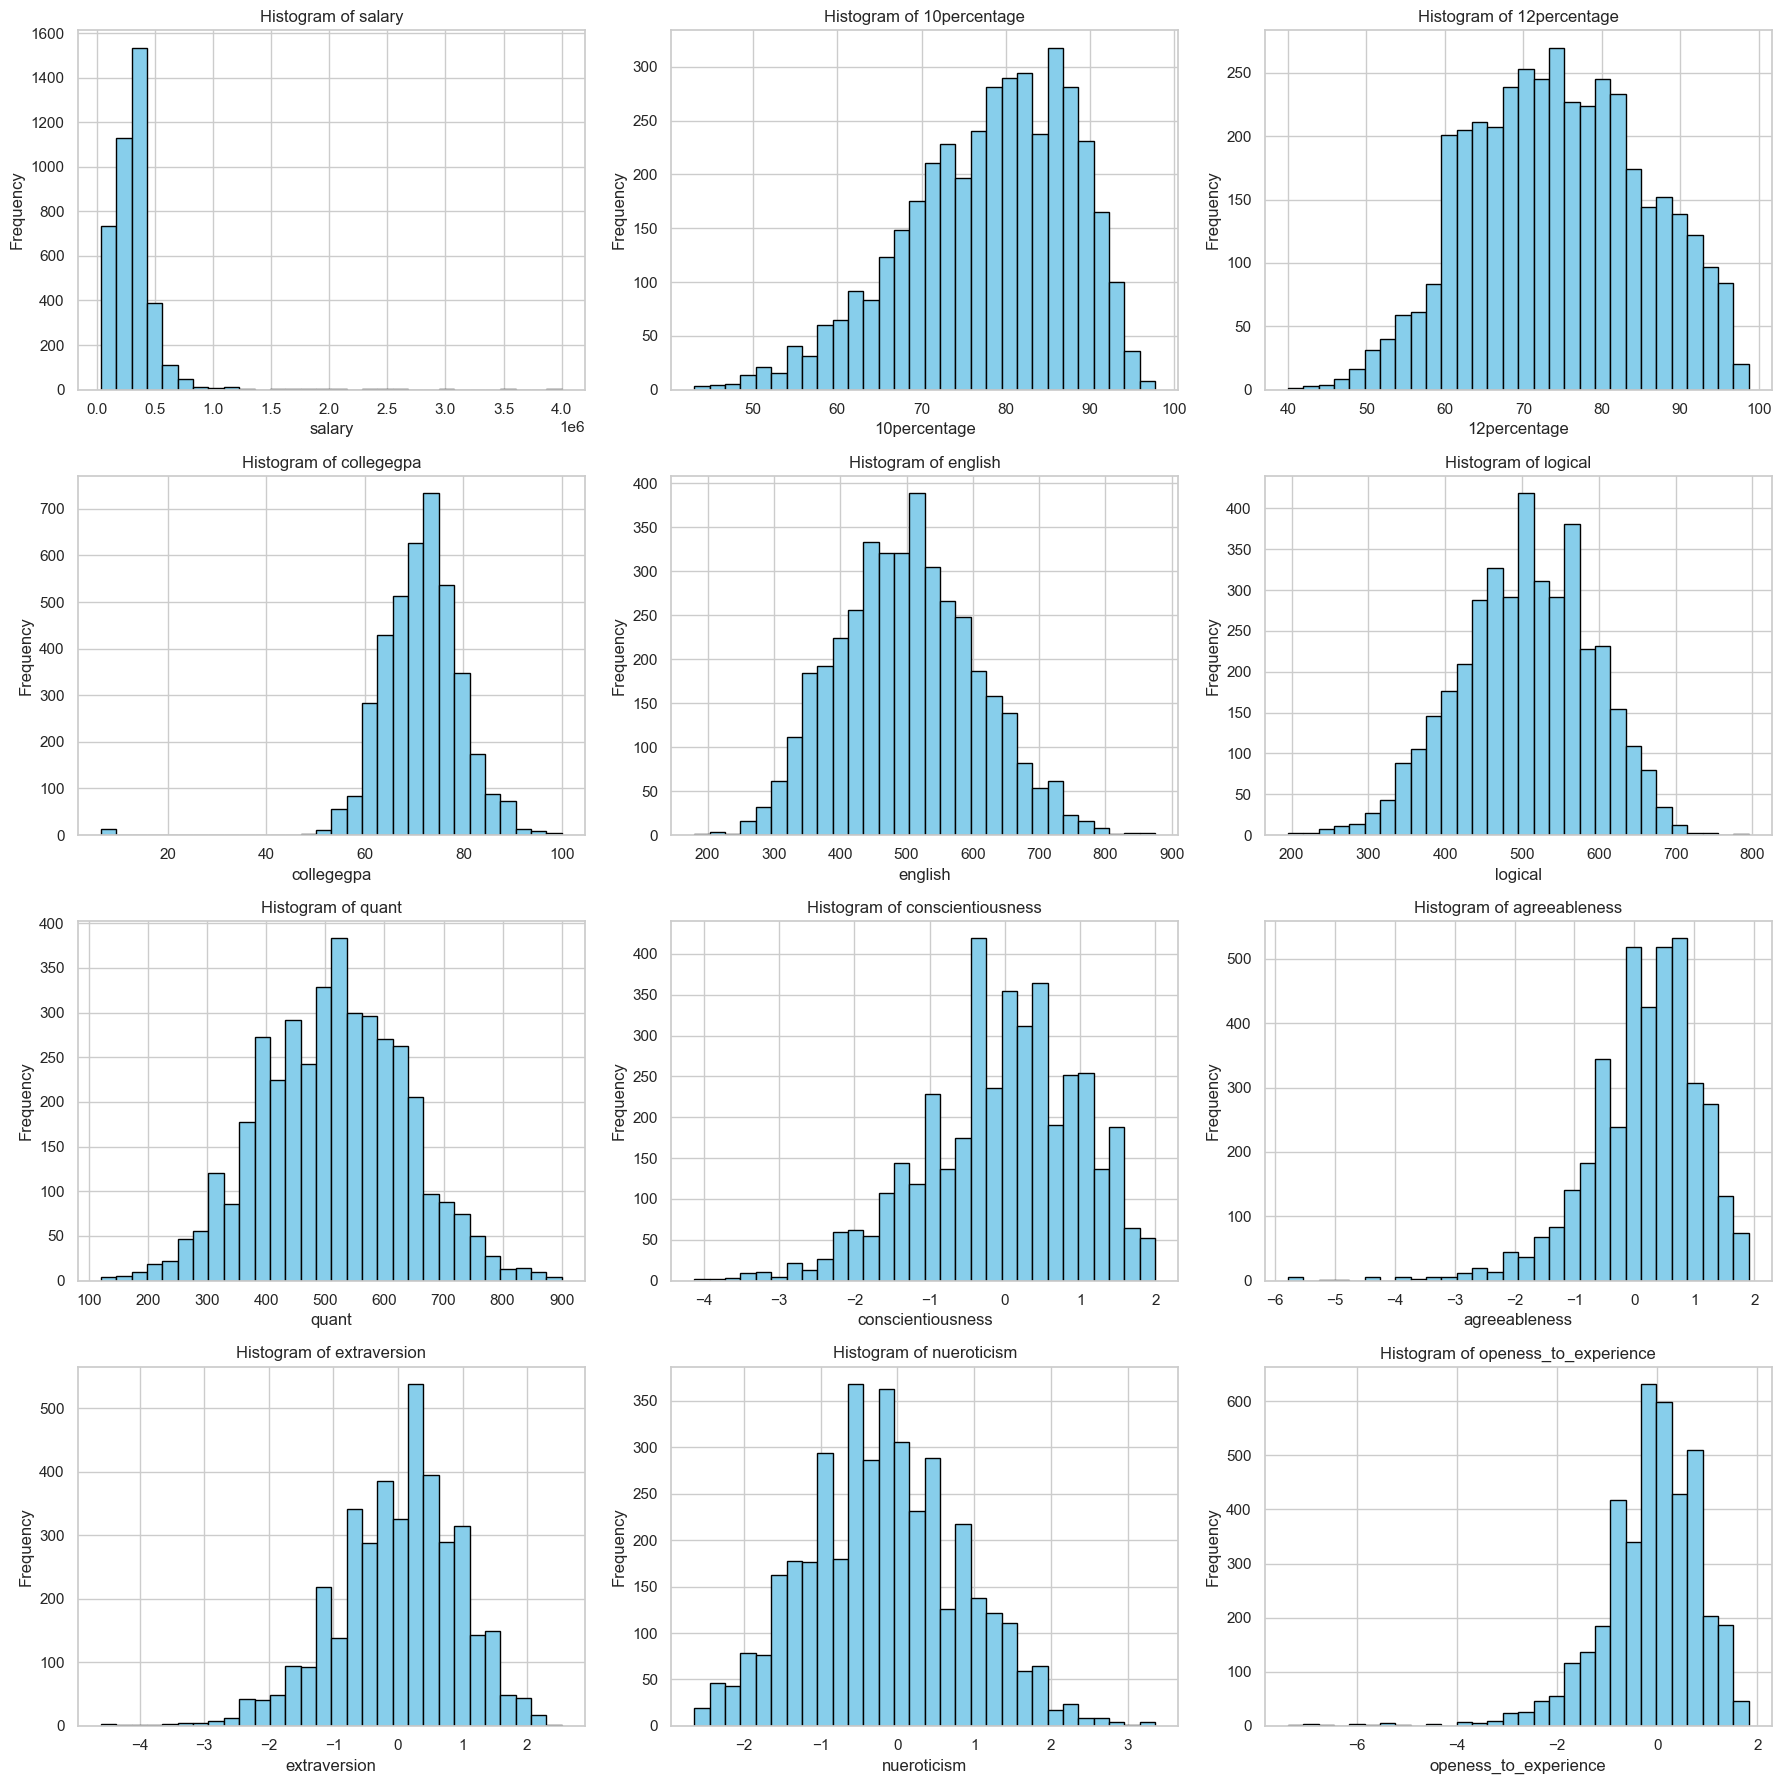

In [213]:
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa','english', 'logical', 'quant','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience']
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18)) # 2 rows, 2 columns layout
axes = axes.flatten() # Flatten the 2D array of axes into 1D for easier iteration
# Loop through each column and its respective axis
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column].dropna(), bins=30, color='skyblue',
    edgecolor='black') # Plot histogram
    axes[i].set_title(f'Histogram of {column}') # Set title for each subplot
    axes[i].set_xlabel(column) # X-axis label
    axes[i].set_ylabel('Frequency') # Y-axis label
# Remove any unused subplots (if there are more axes than columns)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the plot
plt.show()

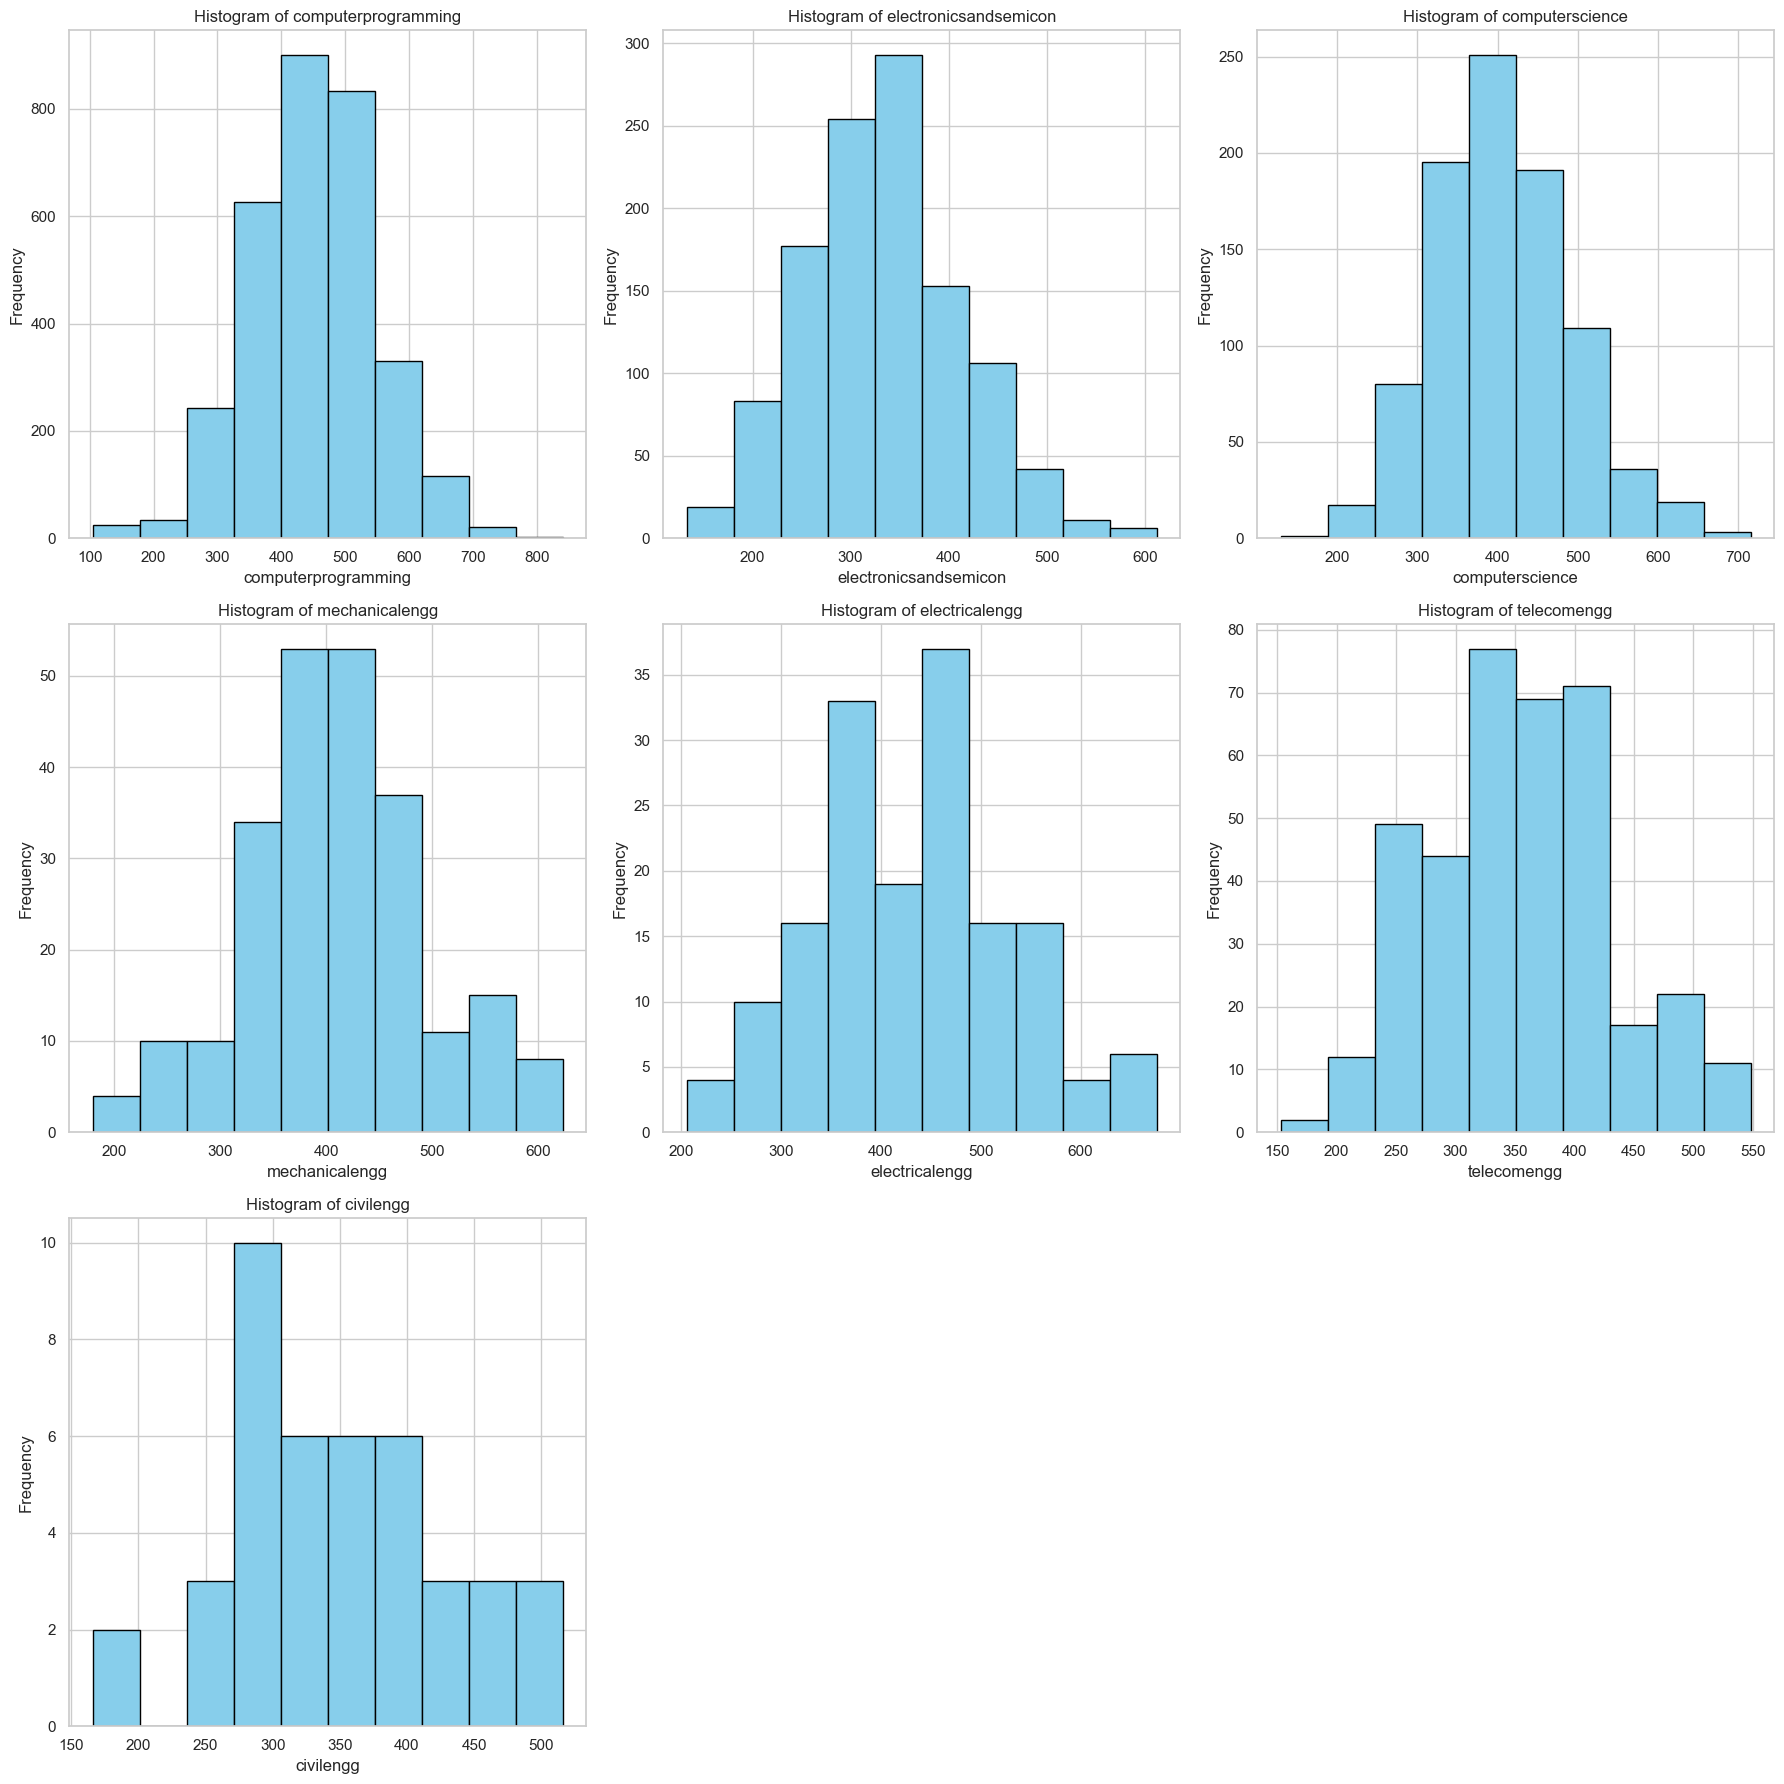

In [214]:
columns_to_plot = ['computerprogramming', 'electronicsandsemicon', 'computerscience','mechanicalengg','electricalengg','telecomengg','civilengg']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18)) # 3 rows, 3 columns layout

axes = axes.flatten() # Flatten the 2D array of axes into 1D for easier iteration
# Loop through each column and its respective axis
def columnValueRemover(row): # return NaN inplace of -1 values
    if row != -1:
        return row
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column].apply(columnValueRemover).dropna(), color='skyblue',
    edgecolor='black') # Plot histogram
    axes[i].set_title(f'Histogram of {column}') # Set title for each subplot
    axes[i].set_xlabel(column) # X-axis label
    axes[i].set_ylabel('Frequency') # Y-axis label
# Remove any unused subplots (if there are more axes than columns)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the plot
plt.show()

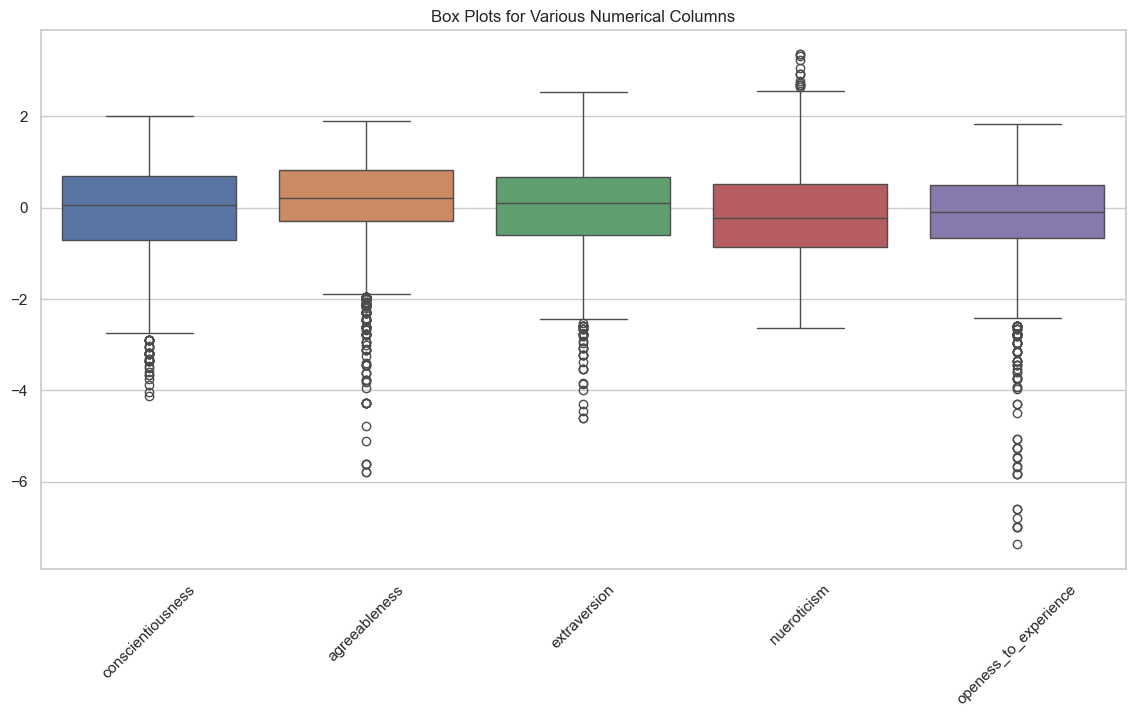

In [215]:
columns_to_plot = ['conscientiousness','agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
# Plot the box plot with valid columns
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[columns_to_plot])
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [216]:
df[['conscientiousness','agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']].describe()


,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,1.028666,0.941782,0.951471,1.007580,1.008075
min,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.995300,1.904800,2.535400,3.352500,1.822400


Text(0.5, 0, 'salary')

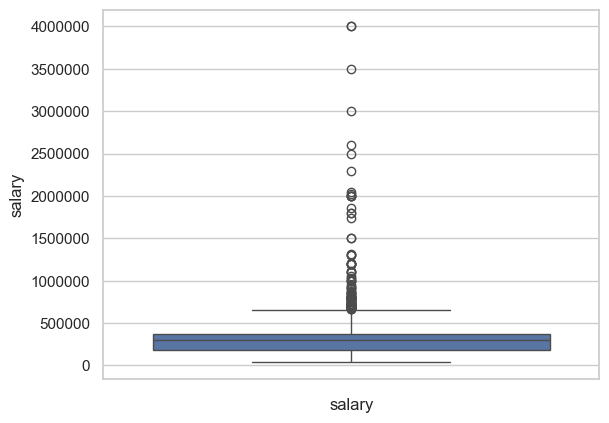

In [217]:
sns.boxplot(data=df['salary'])
plt.gca().yaxis.get_major_formatter().set_scientific(False)  # Disable scientific notation
plt.xlabel('salary')

In [218]:
df[['salary']].describe()

,salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


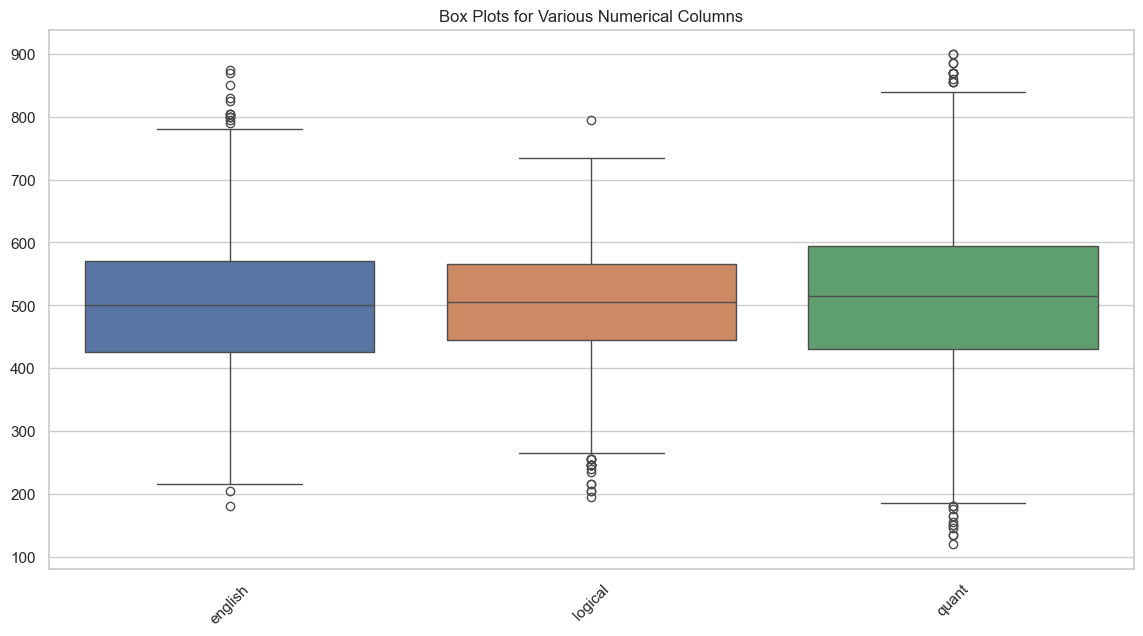

In [219]:
columns_to_plot = ['english', 'logical', 'quant']
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[columns_to_plot])
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [220]:
df[['english', 'logical', 'quant']].describe()

,english,logical,quant
count,3998.000000,3998.000000,3998.000000
mean,501.649075,501.598799,513.378189
std,104.940021,86.783297,122.302332
min,180.000000,195.000000,120.000000
25%,425.000000,445.000000,430.000000
50%,500.000000,505.000000,515.000000
75%,570.000000,565.000000,595.000000
max,875.000000,795.000000,900.000000


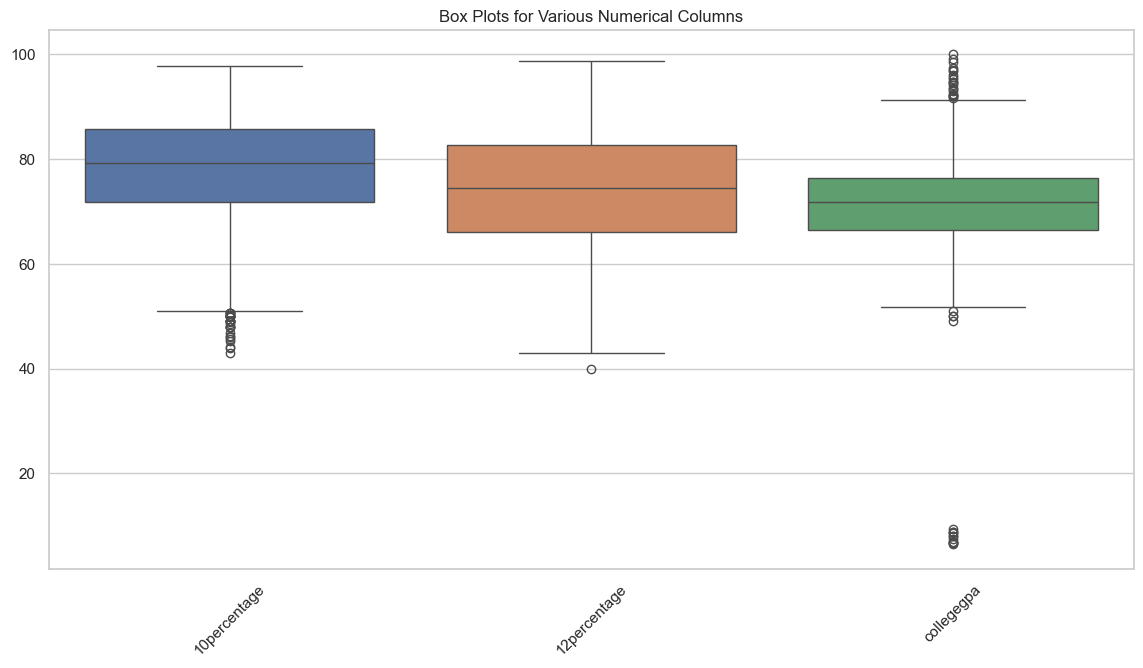

In [221]:
columns_to_plot = ['10percentage', '12percentage', 'collegegpa']
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[columns_to_plot])
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [222]:
df[['10percentage', '12percentage', 'collegegpa']].describe()

,10percentage,12percentage,collegegpa
count,3998.000000,3998.000000,3998.000000
mean,77.925443,74.466366,71.486171
std,9.850162,10.999933,8.167338
min,43.000000,40.000000,6.450000
25%,71.680000,66.000000,66.407500
50%,79.150000,74.400000,71.720000
75%,85.670000,82.600000,76.327500
max,97.760000,98.700000,99.930000


In below boxplot chart & below temporary dataframe we are considering only marks for those students who attempted the exams (i.e. omitting -1 values)

In [223]:
df_temp = pd.DataFrame() # temporary Dataframe 
columns_to_plot = [ 'computerprogramming','computerscience', 'mechanicalengg', 'electricalengg','telecomengg', 'civilengg']
for col in columns_to_plot:
    df_temp[col] = df[col].apply(lambda x: None if x == -1 else x).dropna()
df_temp.describe()


,computerprogramming,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg
count,3130.000000,858.000000,77.000000,90.000000,180.000000,22.000000
mean,451.301278,407.421911,409.168831,428.266667,353.372222,322.363636
std,97.158687,90.282516,82.754933,97.025978,78.706160,66.463413
min,105.000000,130.000000,180.000000,206.000000,153.000000,166.000000
25%,385.000000,346.000000,366.000000,356.000000,292.000000,292.000000
50%,455.000000,407.000000,409.000000,439.500000,356.000000,320.000000
75%,515.000000,469.000000,446.000000,500.000000,393.000000,356.000000
max,840.000000,715.000000,623.000000,633.000000,548.000000,516.000000


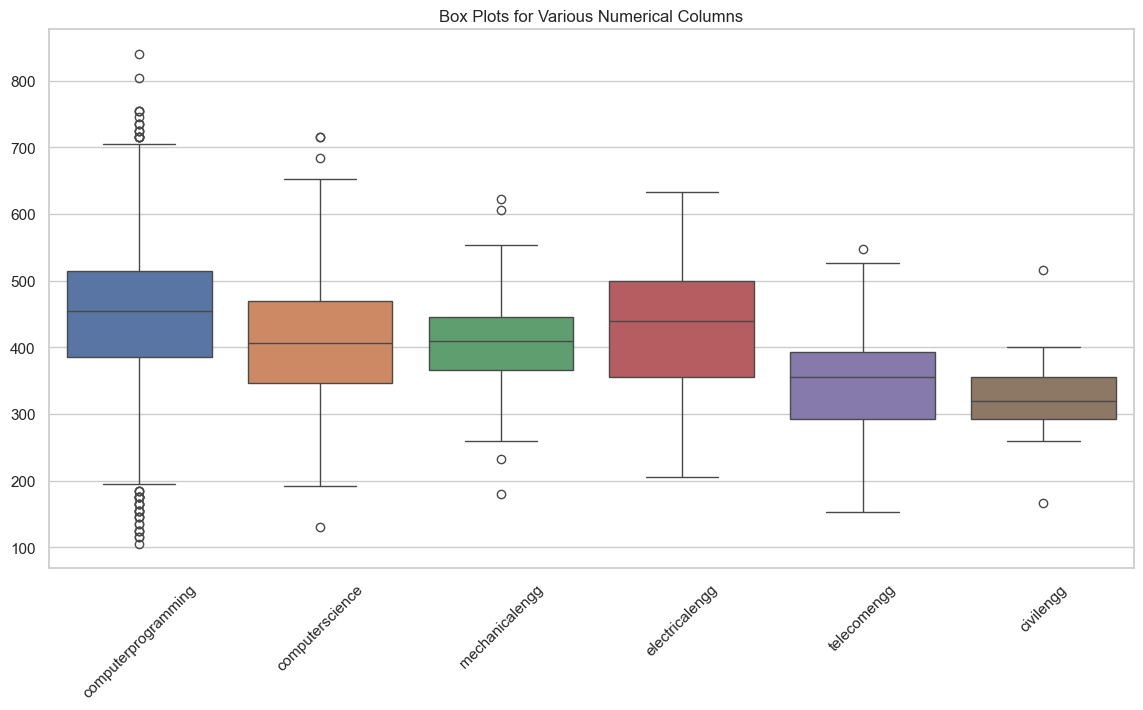

In [224]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_temp)
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(ticks=range(len(columns_to_plot)), labels=columns_to_plot, rotation=45)
plt.show()

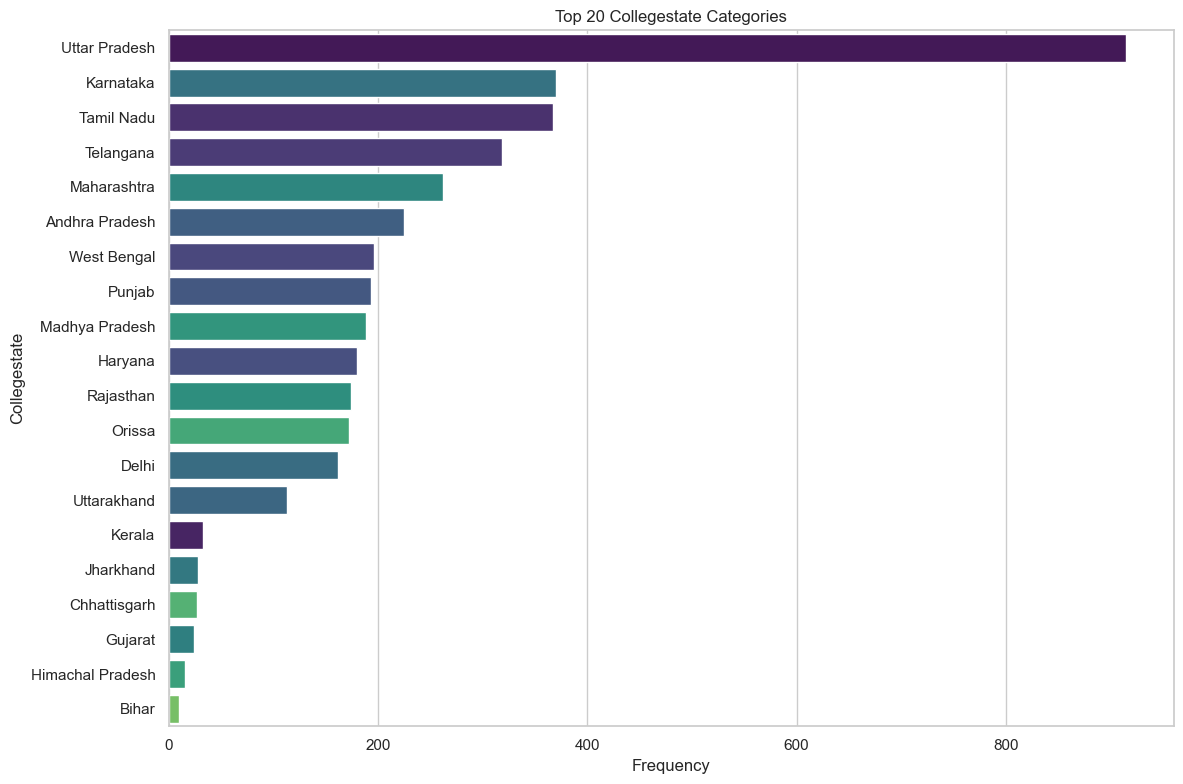

In [225]:
top_collegestates = df['collegestate'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.countplot(y='collegestate', data=df[df['collegestate'].isin(top_collegestates.index)],hue=df['collegestate'],legend = False,palette='viridis', order=top_collegestates.index)
plt.title('Top 20 Collegestate Categories')
plt.xlabel('Frequency')
plt.ylabel('Collegestate')
plt.tight_layout()
plt.show()

C:\Users\ritik\AppData\Local\Temp\ipykernel_24356\3398479499.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis') # Horizontal bar plot
C:\Users\ritik\AppData\Local\Temp\ipykernel_24356\3398479499.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis') # Horizontal bar plot
C:\Users\ritik\AppData\Local\Temp\ipykernel_24356\3398479499.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, 

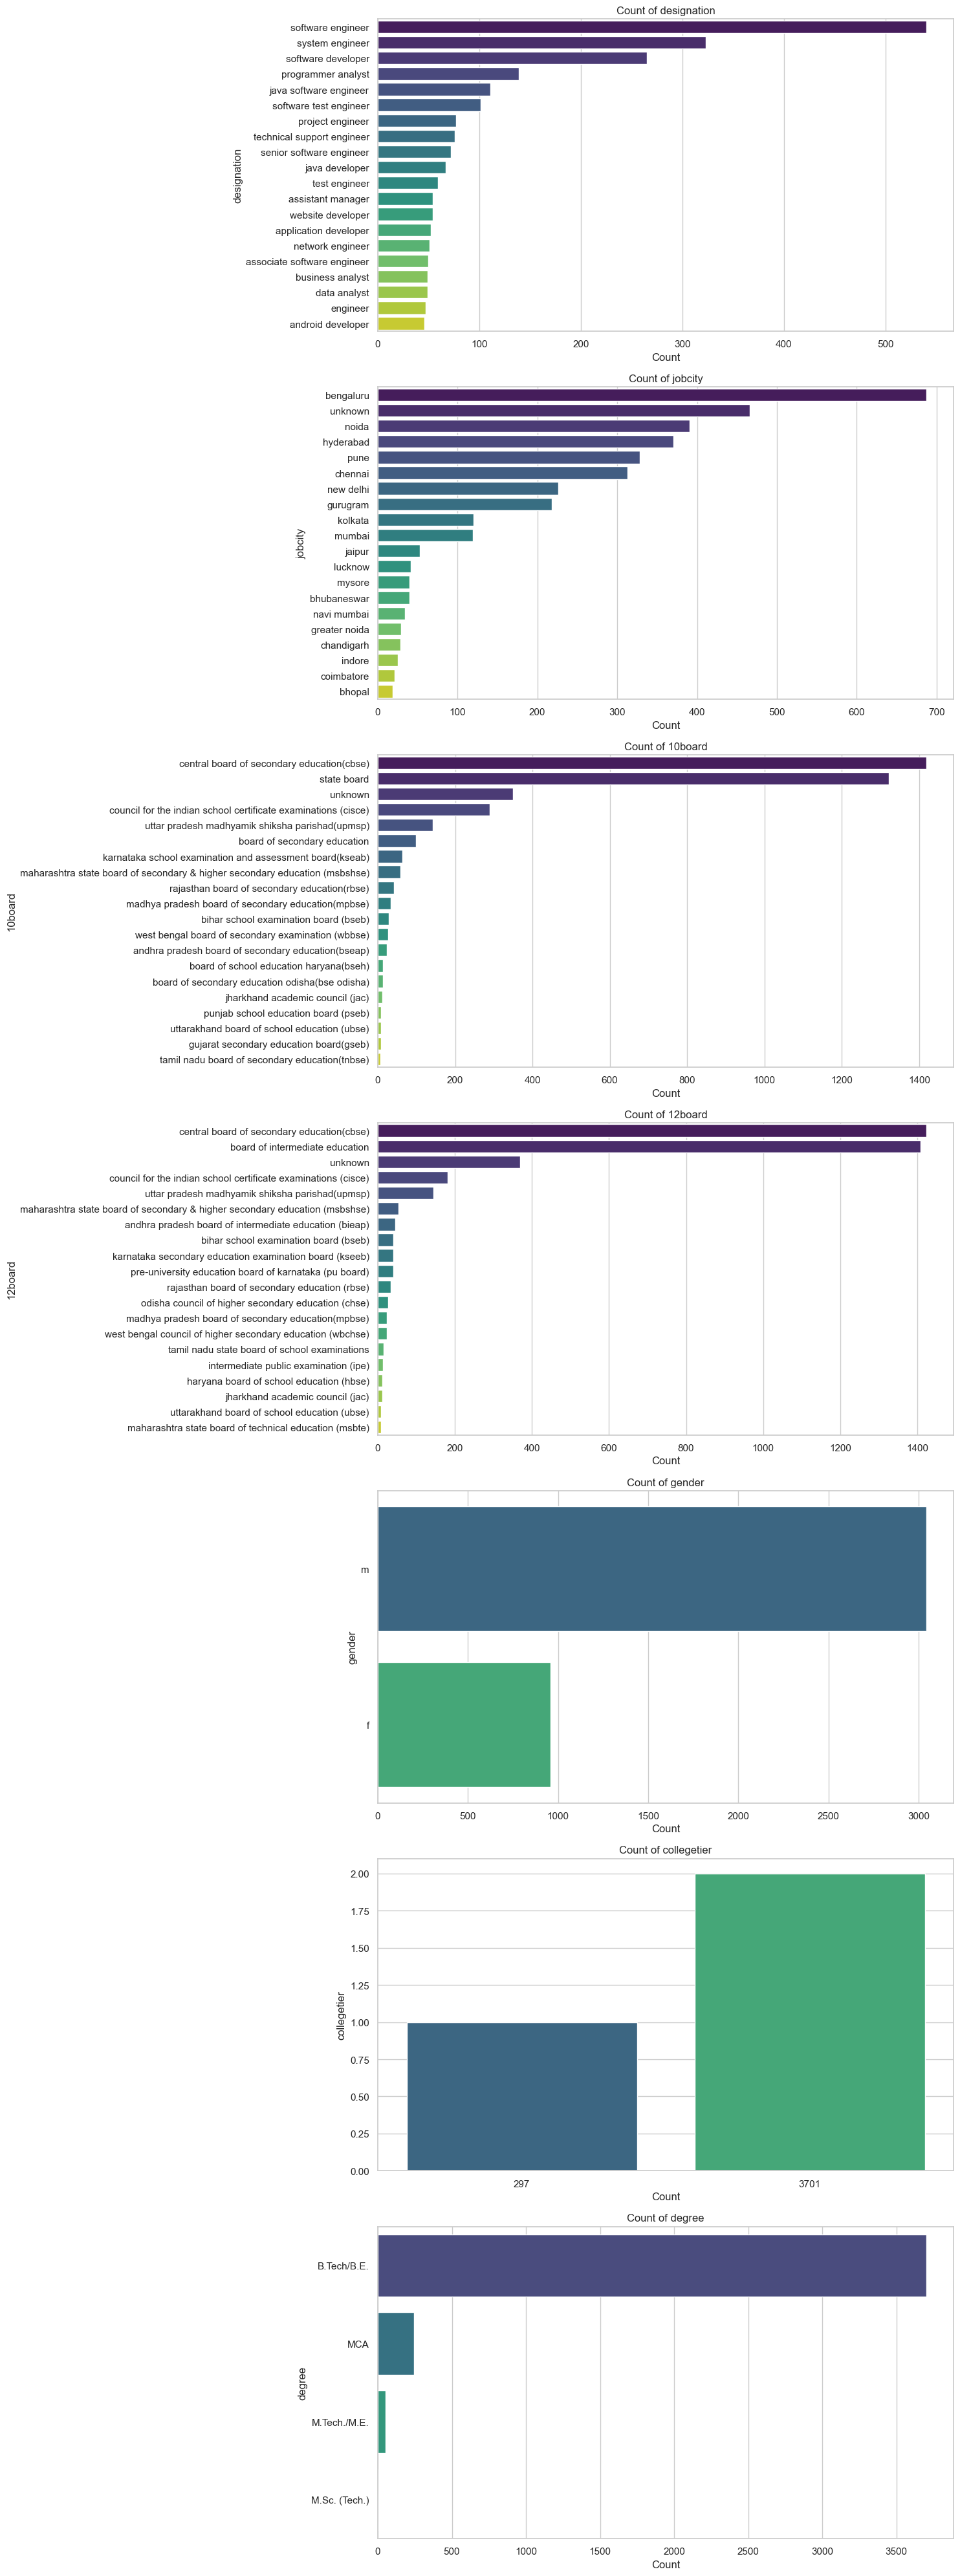

In [226]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")
# List of important categorical columns
important_categorical_columns = ['designation', 'jobcity','10board','12board', 'gender','collegetier', 'degree']
# Create a bar plot for each important categorical column
plt.figure(figsize=(15, 40)) 
for i, column in enumerate(important_categorical_columns):
    plt.subplot(len(important_categorical_columns), 1, i + 1) # Create asubplot for each column
    top_values = df[column].value_counts().nlargest(20) # Get top 20 values
    sns.barplot(x=top_values.values, y=top_values.index, palette='viridis') # Horizontal bar plot
    plt.title(f'Count of {column}') # Set the title
    plt.xlabel('Count') # Label for x-axis
    plt.ylabel(column) # Label for y-axis
plt.tight_layout() # Adjust layout to prevent clipping of tick-labels
plt.show()

In this dataset,  
1. Top 5 Designations (by count) :  
    a. 'software engineer'  
    b. 'system engineer'
    c. 'software developer'  
    d. 'programmer analyst'
    e. 'java software engineer'
1. Top 5 Job cities (by count) :  
    a. 'bangalore'   
    b. 'unknown'  
    c. 'noida'  
    d. 'hyderabad'   
    e. 'pune' 
1. Top 5 10th & 12th boards(by count) are same for both :  
    a. 'cbse' board  
    b. 'state board'/'board of intermediate education' board (respectively), we don't know its of which state though  
    c. 'unknown' board  
    d. 'cisce' board  
    e. 'upmsp' board

2. There are more than 3 times the number of males than females  
3. There are more than 10 times the number of 2-tier colleges than there are 1-tier colleges  
4. B.Tech/B.E. degree present more than 85%

# Bivariate Analysis

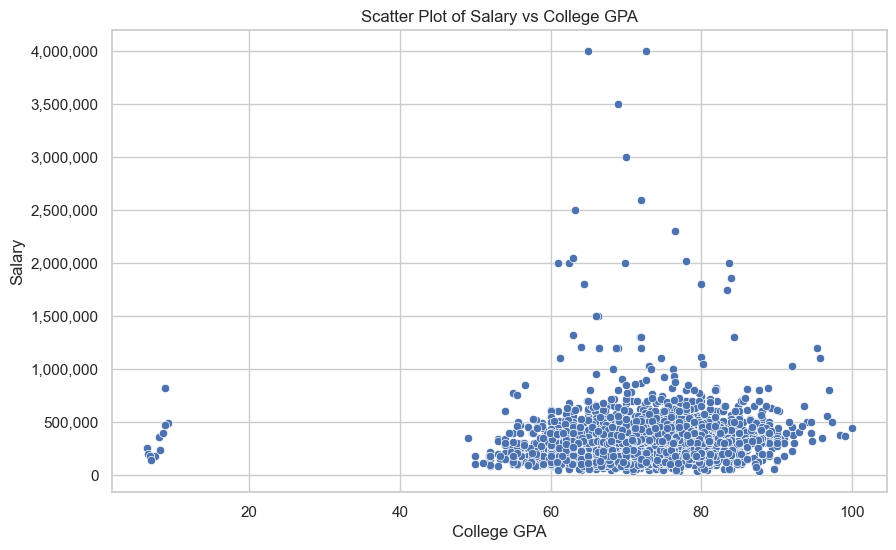

In [227]:
from matplotlib.ticker import FuncFormatter
# Function to format y-axis labels
def currency(x, _):
    return f'{int(x):,}' # Format as integer with commas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='collegegpa', y='salary')
plt.title('Scatter Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.grid(True)
# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

There is no linear relationship b/w College GPA & Salary,  
Salary seems constant mostly irrespective of College GPA(>50)

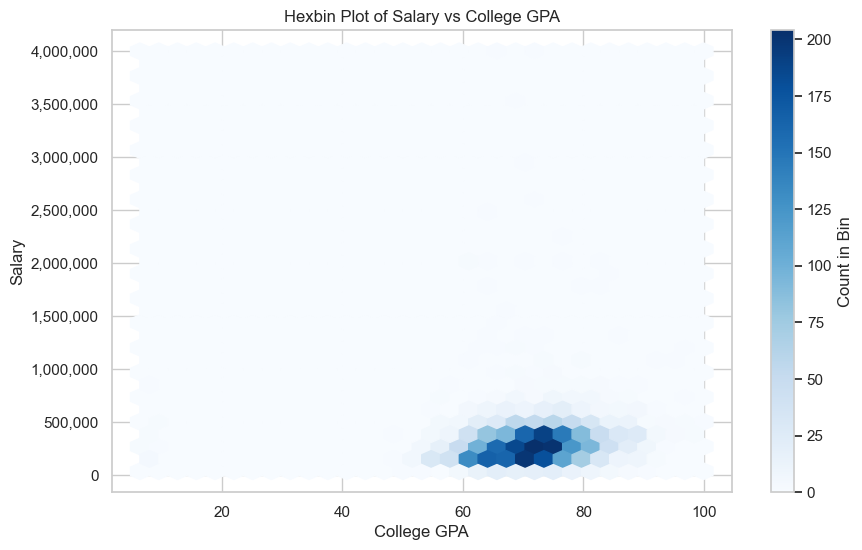

In [228]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['collegegpa'], df['salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

Most people are centred at College GPA 75 & Salary 3.5 Lakh  
The same insight we got above when univariately analysing Salary & College GPA columns.

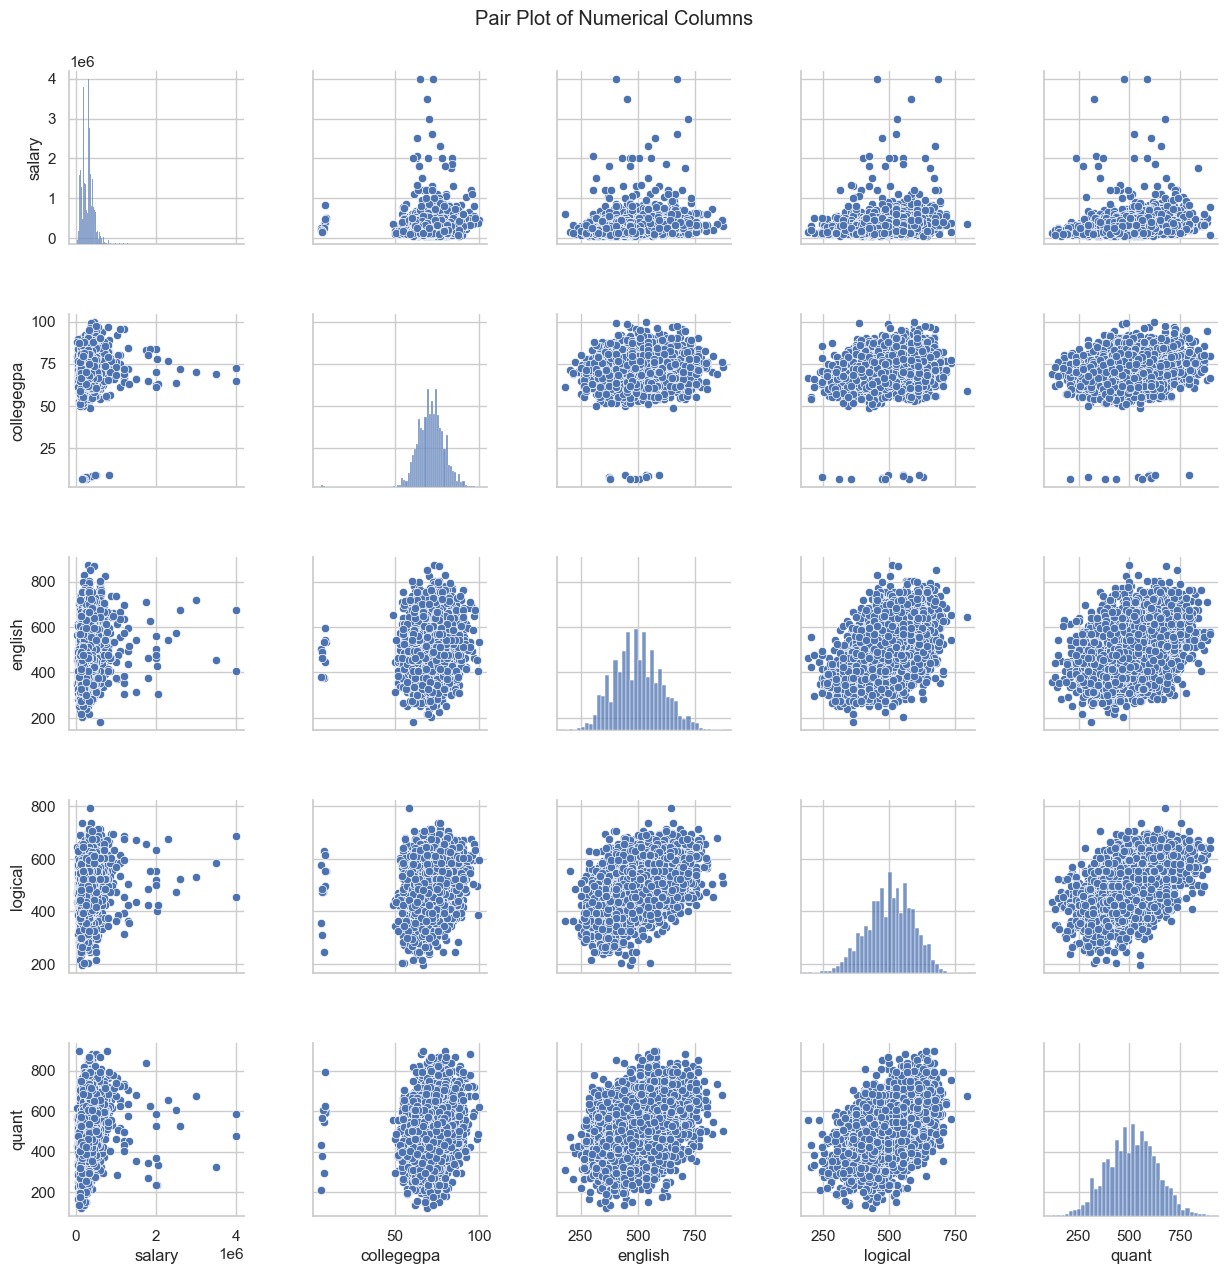

In [229]:
numerical_columns = ['salary', 'collegegpa', 'english', 'logical', 'quant']
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

There is weak linear relationship b/w english & logical, quant & logical.
There is no linear relationship b/w other numerical columns.  

### Salary(Numerical) vs Degree(Categorical)

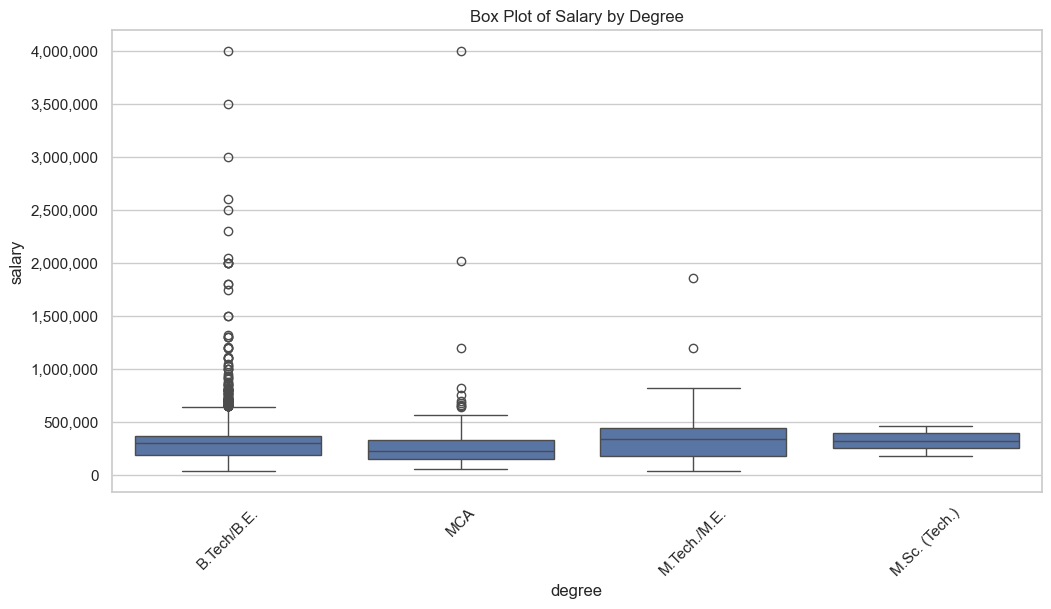

In [230]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='degree', y='salary')
plt.title('Box Plot of Salary by Degree')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

M.Tech/M.E has higher variability in salary than the other degrees(M.Sc. has least)  
B.Tech/B.E. has a lot of outliers 

### Salary(Numerical) vs Designation(Categorical)

In [231]:
df_grouped_by_designation = df[['designation','salary']].groupby('designation').mean('salary')

In [232]:
df_grouped_by_designation.sort_values(by = 'salary',ascending=False,inplace=True)
df_grouped_by_designation.head()

,salary
designation,
junior manager,1.300000e+06
senior developer,1.110000e+06
data scientist,8.966667e+05
field engineer,8.016667e+05
software engineer trainee,7.816667e+05


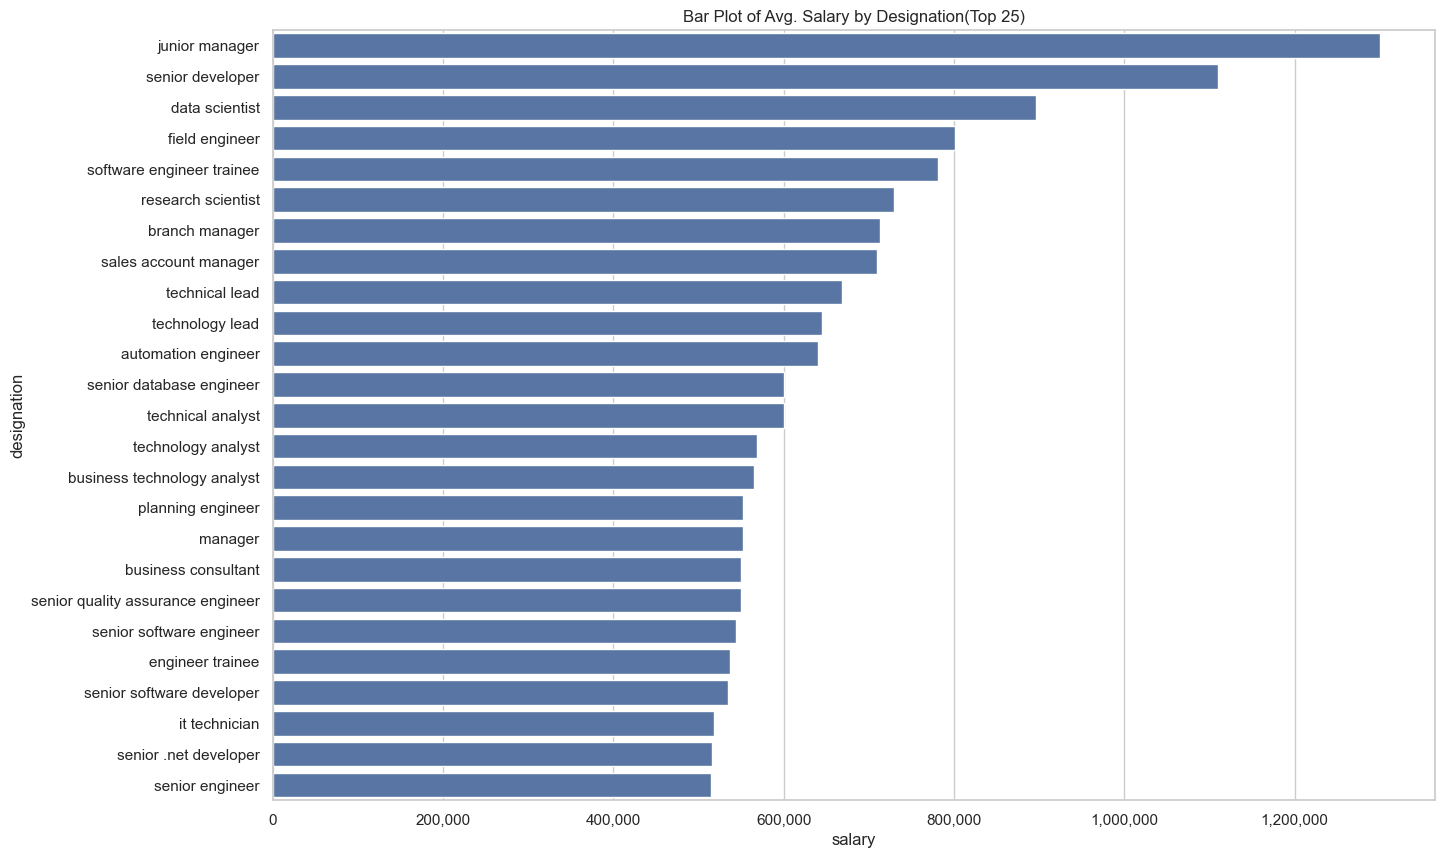

In [233]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_grouped_by_designation[:25], y='designation', x='salary',estimator=np.mean)
plt.title('Bar Plot of Avg. Salary by Designation(Top 25)')
plt.xticks()
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

Top 3 Designations (by average salary) :  
junior manager, senior developer, data scientist

Interesting Observation :  
In this dataset, the software engineer trainee's average salary is more than the average salary of desginations(at senior position) like senior .net developer, senior software developer, senior software engineer  
Why this maybe the case ?  
It is possible that software engineer trainee could be from top product based companies. Another reason could be due to geographical differences.

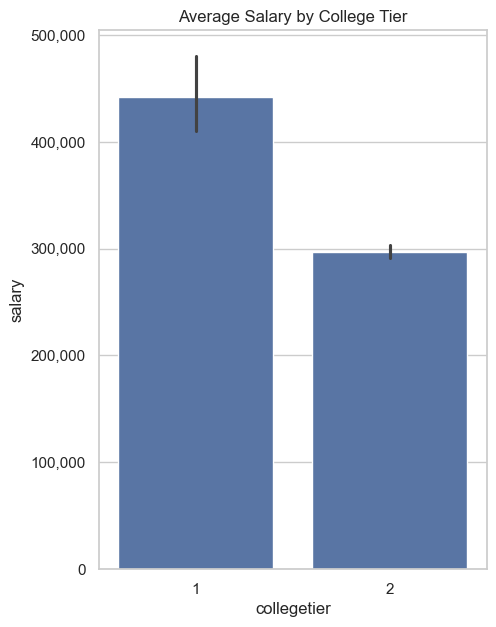

In [234]:
plt.figure(figsize=(5, 7))
sns.barplot(data=df, x='collegetier', y='salary', estimator=np.mean)
plt.title('Average Salary by College Tier')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

As expected, 1st-college tier has higher salary packages than 2nd-college tier

# Research Question 1


In [235]:
# -	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 
# We will test this claim

In [236]:
# filtering based on :
# 1. Designations : Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer (those designations considered too which falls under these 4 job roles)
# 2. fresh graduate # DOJ is same as graduate year or 1 yr more than graduate year.
# 3. degree - btech/be & mtech/me
# 4. specialization - computer & engineering present (information tech. included)

unqlist = df['designation'].unique()
unqlist.sort()
# len(unqlist) # 396 unique designations
unqlist

array(['.net developer', '.net website developer', 'account executive',
       'account manager', 'administrative coordinator',
       'administrative support', 'aircraft technician',
       'android developer', 'application developer',
       'application engineer', 'apprentice', 'ase', 'asp.net developer',
       'assistant admin', 'assistant administrator', 'assistant clerical',
       'assistant electrical engineer', 'assistant engineer',
       'assistant executive', 'assistant executive administrative',
       'assistant human resource', 'assistant it', 'assistant manager',
       'assistant marketing', 'assistant operations',
       'assistant professor', 'assistant programmer', 'assistant project',
       'assistant software engineer', 'assistant store manager',
       'assistant system engineer', 'assistant system engineer trainee',
       'assistant technical', 'associate catalog',
       'associate client services', 'associate developer',
       'associate engineer', 'associ

In [237]:
pa_analyst_he_se_as_roles = ["Analyst Programmer","Systems Analyst",
    "Software Developer",
    "Business Analyst",
    "Technical Analyst",
    "Application Developer",
    "Database Analyst",
    "IT Consultant",
    "Support Analyst",
    "Programmer Analyst",
    "Web Developer",
    "Data Analyst",
    "Quality Assurance Analyst",
    "DevOps Engineer",
    "Solutions Architect",
    "Enterprise Architect",
    "Product Analyst",
    "Technical Support Engineer",
    "Integration Analyst",
    "Network Analyst",
    "Cloud Solutions Developer",
    "Hardware Engineer",
    "Computer Hardware Engineer",
    "Electrical Engineer",
    "Electronics Engineer",
    "Embedded Systems Engineer",
    "Firmware Engineer",
    "Hardware Design Engineer",
    "Test Engineer",
    "PCB Design Engineer",
    "Systems Engineer",
    "Field Application Engineer",
    "Network Hardware Engineer",
    "Manufacturing Engineer",
    "Quality Assurance Engineer",
    "Product Development Engineer",
    "Application Hardware Engineer",
    "Robotics Hardware Engineer",
    "Computer Vision Engineer",
    "Signal Processing Engineer",
    "Hardware Integration Engineer",
    "Research and Development Engineer",
    "Software Engineer",
    "Junior Software Engineer",
    "Senior Software Engineer",
    "Lead Software Engineer",
    "Software Architect",
    "Principal Software Engineer",
    "Chief Technology Officer (CTO)",
    "Full Stack Engineer",
    "Front-End Engineer",
    "Back-End Engineer",
    "Mobile Application Developer",
    "Web Developer",
    "DevOps Engineer",
    "Data Engineer",
    "Machine Learning Engineer",
    "AI Engineer",
    "Game Developer",
    "Software Development Engineer in Test (SDET)",
    "Quality Assurance (QA) Engineer",
    "Systems Engineer",
    "Cloud Solutions Architect",
    "Embedded Software Engineer",
    "Security Engineer",
    "Database Developer/Engineer",
    "Technical Support Engineer",
    "Application Support Analyst",
    "Research and Development (R&D) Engineer",
    "Integration Engineer",
    "Technical Project Manager",
    "Associate Engineer",
    "Junior Engineer",
    "Entry-Level Engineer",
    "Mechanical Associate Engineer",
    "Electrical Associate Engineer",
    "Civil Associate Engineer",
    "Software Associate Engineer",
    "Environmental Associate Engineer",
    "Quality Assurance Associate Engineer",
    "Manufacturing Associate Engineer",
    "Project Associate Engineer",
    "Design Associate Engineer",
    "Systems Associate Engineer",
    "Field Associate Engineer",
    "Research Associate Engineer",
    "Data Associate Engineer",
    "Network Associate Engineer",
    "Construction Associate Engineer",
    "Product Development Associate Engineer",
    "Technical Support Associate Engineer",
    "Process Associate Engineer",
    "Chemical Associate Engineer",
    "Robotics Associate Engineer",
    "Instrumentation Associate Engineer",
    "Geotechnical Associate Engineer",
    "Structural Associate Engineer",
    "Petroleum Associate Engineer",
    "Biomedical Associate Engineer",
    "Telecommunications Associate Engineer",
    "Nuclear Associate Engineer"
]
for i in range(len(pa_analyst_he_se_as_roles)):
    pa_analyst_he_se_as_roles[i] = pa_analyst_he_se_as_roles[i].lower()
# programmer_analyst_roles
filtered_designations = [] # list of designations used for filtering dataset
for designation in unqlist:
    if (('software' in designation ) or ('hardware' in designation) or
    ('associate' in designation) and ('engineer' in designation)) or (designation in pa_analyst_he_se_as_roles):
        filtered_designations.append(designation)

In [238]:
degree_condition = df['degree'].isin(['B.Tech/B.E.','M.Tech./M.E.'])
specialization_condition = (df['specialization'].isin(['information technology','computer science & engineering', 'computer engineering', 'computer science','computer and communication engineering','computer science and technology'])) | (df['specialization'] == 'information technology')
job_role_condition = df['designation'].isin(filtered_designations)
fresh_graduate_condition = (df['doj'].dt.year == df['graduationyear']) | (df['doj'].dt.year == (df['graduationyear'] + 1))

df_filtered = df[job_role_condition & fresh_graduate_condition & degree_condition & specialization_condition]

In [239]:
df_filtered.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1,339689,200000,2012-08-01,12/1/2013 0:00,software engineer,unknown,f,1991-08-20,75.67,uttar pradesh madhyamik shiksha parishad(upmsp),...,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539
3,754392,120000,2014-07-01,present,test engineer,unknown,m,1992-02-18,76.00,state board,...,-1,-1,-1,-1,-1,-0.1590,-0.2871,0.4711,0.27270,-0.4776
7,773975,460000,2013-06-01,present,technical support engineer,unknown,m,1990-04-08,62.00,state board,...,-1,-1,-1,-1,-1,-1.1644,-1.6191,-1.2196,-0.10760,-2.2021
17,1043571,115000,2014-01-01,present,software developer,unknown,m,1990-02-13,81.20,central board of secondary education(cbse),...,407,-1,-1,-1,-1,-0.8772,-0.9531,-0.6048,0.39950,-1.6273
21,190981,550000,2011-07-01,7/1/2013 0:00,software engineer,unknown,m,1989-11-18,94.60,council for the indian school certificate exam...,...,-1,-1,-1,-1,-1,-1.1901,0.3448,-1.9405,-0.76030,0.0284


#### Testing the Claim by TOI - 
Computer Science Engineering (Btech/BE & Mtech/ME) fresh graduates (1-2 year from Graduation Date) who are in job roles of a Programming Analyst/ Software Engineer/ Hardware Engineer/ Associate Engineer earns up to 2.5-3 lakh.

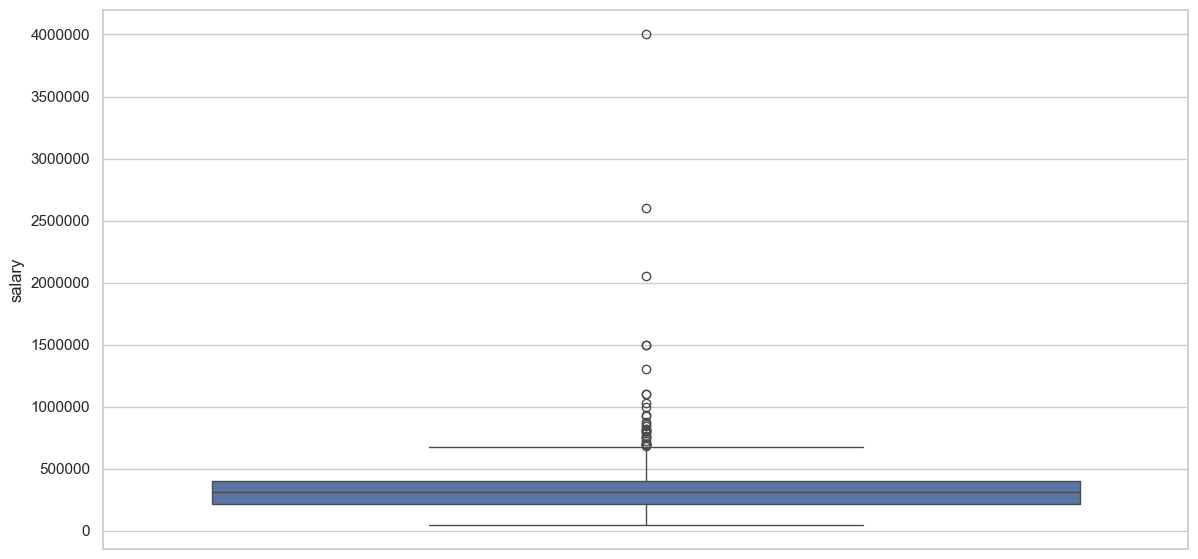

In [240]:
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(14, 7))

# Format the y-axis to show full values
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)  # Disable scientific notation

sns.boxplot(data=df_filtered['salary'])
plt.yticks()
plt.show()

Observations :  
75% of people's salary is below 4 lakh

<Axes: >

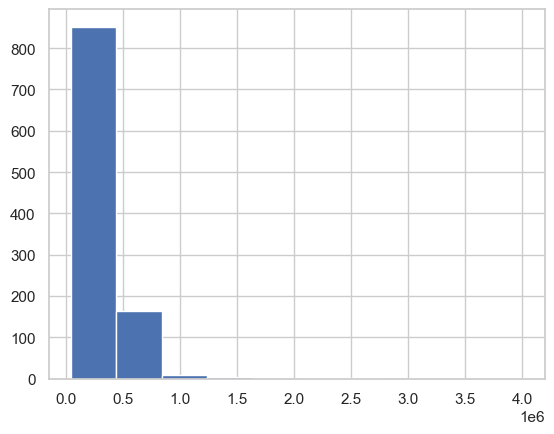

In [241]:
df_filtered['salary'].hist()


Observations :  
Most people's salary here falls below 5 lakh

In [242]:
# df_filtered[df_filtered['salary'] > 300000].count() # 563 occurences
df_filtered[df_filtered['salary'] < 300000].count() # 384 occurences
# df_filtered[df_filtered['salary'] > 400000].count() # 230 occurences
# df_filtered[df_filtered['salary'] > 500000].count() # 102 occurences


id                       384
salary                   384
doj                      384
dol                      384
designation              384
jobcity                  384
gender                   384
dob                      384
10percentage             384
10board                  384
12graduation             384
12percentage             384
12board                  384
collegeid                384
collegetier              384
degree                   384
specialization           384
collegegpa               384
collegecityid            384
collegecitytier          384
collegestate             384
graduationyear           384
english                  384
logical                  384
quant                    384
domain                   384
computerprogramming      384
electronicsandsemicon    384
computerscience          384
mechanicalengg           384
electricalengg           384
telecomengg              384
civilengg                384
conscientiousness        384
agreeableness 

In [243]:
from scipy import stats

salaries = df_filtered['salary']
population_mean = 300000  

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(salaries, population_mean)

# Output results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Set significance level
alpha = 0.05

# Decision based on p-value
if p_value < alpha:
    print("There is sufficient evidence that the average salary exceeds ₹3 lakh.")
else:
    print("There is not sufficient evidence that the average salary exceeds ₹3 lakh.")

T-statistic: 4.967021385534219
P-value: 7.955260752746044e-07
There is sufficient evidence that the average salary exceeds ₹3 lakh.


### Insight
We can see that the claim by TOI is False.

# Research Question 2

#### -	Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [244]:
# Create a contingency table
contingency_table = pd.crosstab(df['specialization'],df['gender'])
# Display the contingency table
print("\t\tContingency Table:")
print(contingency_table)

		Contingency Table:
gender                                         f    m
specialization                                       
aeronautical engineering                       1    2
applied electronics and instrumentation        2    7
automobile/automotive engineering              0    5
biomedical engineering                         2    0
biotechnology                                  9    6
ceramic engineering                            0    1
chemical engineering                           1    8
civil engineering                              6   23
computer and communication engineering         0    1
computer application                          59  185
computer engineering                         175  425
computer networking                            0    1
computer science                               1    1
computer science & engineering               183  561
computer science and technology                2    4
control and instrumentation engineering        0    1
electri

In [245]:
# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# Output results
print("Chi-Squared Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
# print("Expected Frequencies:\n", expected)

# Step 3: Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")

Chi-Squared Statistic: 104.46891913608454
P-Value: 1.2453868176977014e-06
Degrees of Freedom: 45
There is a significant relationship between gender and specialization.


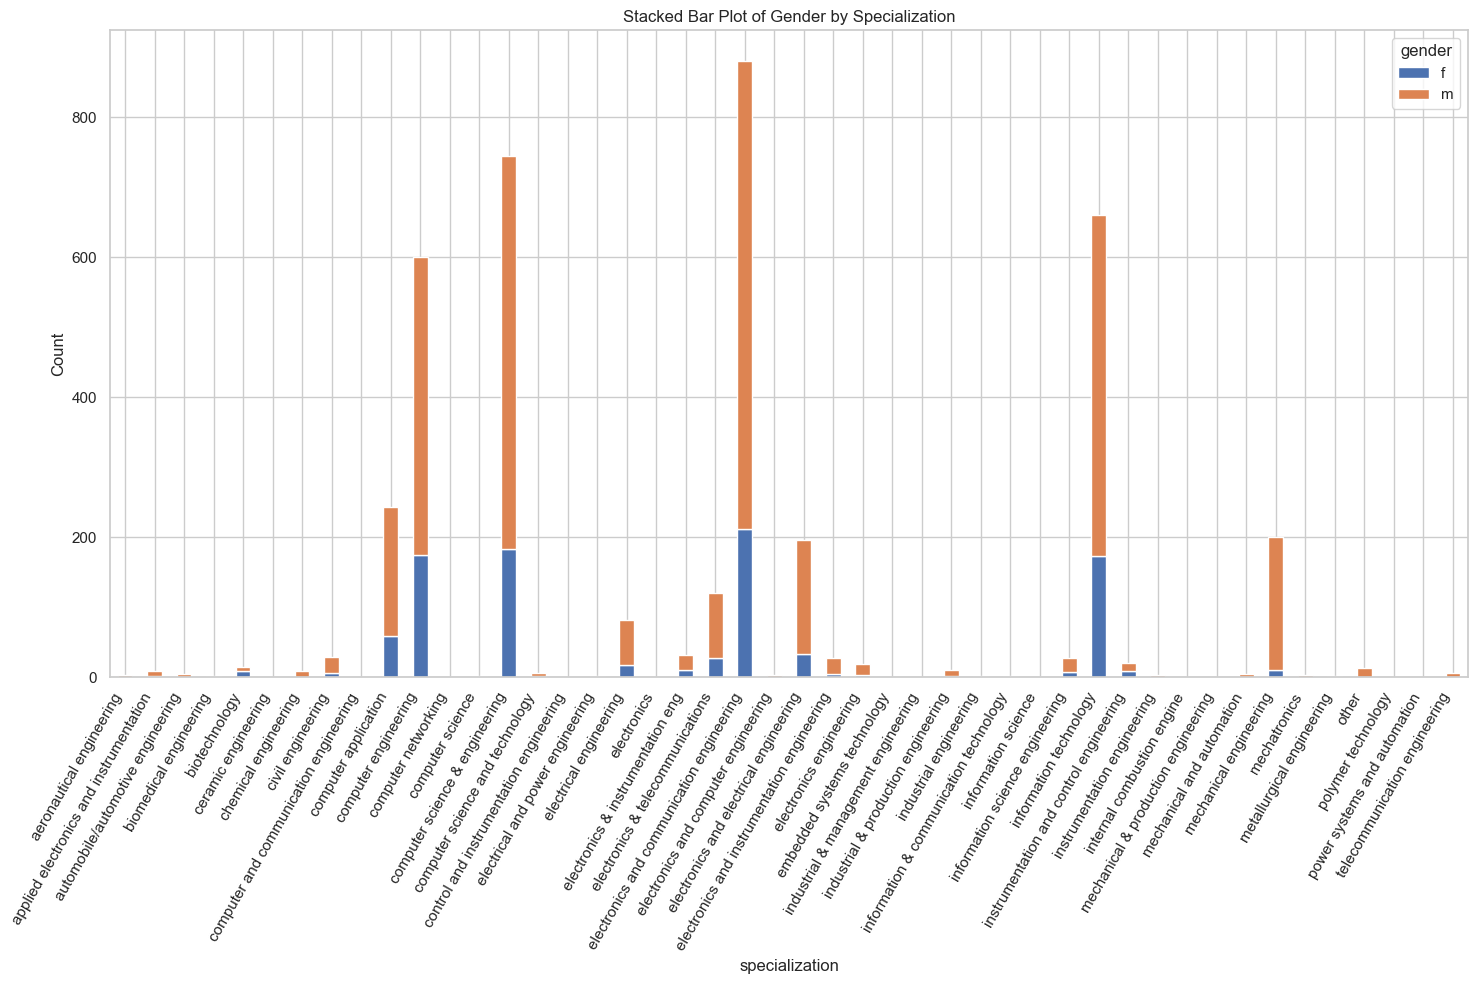

In [246]:
# Categorical v/s Categorical variable
pivot_table = df.pivot_table(index='specialization', columns='gender',
values='salary', aggfunc='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Plot of Gender by Specialization')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='right') # Adjusted alignment to 'right'
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

Observations :  
In atleast 8 specializations, the number of males outnumber number of females by thrice amount

In [247]:
df['male'] = (df['gender'] == 'm').astype(int)
df['female'] = (df['gender'] == 'f').astype(int)
df_grouped_by_specialization = df[['specialization','female','male']].groupby('specialization').sum()

In [248]:
df_grouped_by_specialization.head()

,female,male
specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6


### What %age of specializations have :

1. No females enrolled - 41%

In [249]:
len(df_grouped_by_specialization[df_grouped_by_specialization['female'] == 0])/len(df_grouped_by_specialization)

0.41304347826086957

2. Atleast twice many males than females (in specializations where females enrolled)                  
45% approx

In [250]:
len(df_grouped_by_specialization[(df_grouped_by_specialization['female'] != 0) &(df_grouped_by_specialization['male'] >= 2 * df_grouped_by_specialization['female'])])/len(df_grouped_by_specialization)

0.45652173913043476

2. Atleast 4 times as many males than females (in those specializations where females enrolled) - 15% approx

In [251]:
len(df_grouped_by_specialization[(df_grouped_by_specialization['female'] != 0) &(df_grouped_by_specialization['male'] >= 4 * df_grouped_by_specialization['female'])])/len(df_grouped_by_specialization)

0.15217391304347827

### From chart also, we can see that there seems relationship b/w gender & specialization

### Research Question 3:
Freshers leave their job after how many days in the job?


In [252]:
fresh_graduate_condition = (df['doj'].dt.year == df['graduationyear']) | (df['doj'].dt.year == (df['graduationyear'] + 1))

df_freshers = df[fresh_graduate_condition]

In [253]:
df_freshers_left =df_freshers[df_freshers['dol'] != "present"].copy() # deep copy
df_freshers_left.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,male,female
1,339689,200000,2012-08-01,12/1/2013 0:00,software engineer,unknown,f,1991-08-20,75.67,uttar pradesh madhyamik shiksha parishad(upmsp),...,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,0,1
2,533417,200000,2013-01-01,6/1/2013 0:00,management trainee,unknown,m,1991-02-28,88.00,kerala board of public examinations (kbpe),...,-1,-1,-1,0.3941,1.2808,0.2366,-2.19980,-0.4455,1,0
4,1089852,100000,2013-08-01,5/1/2014 0:00,software developer,unknown,f,1992-05-17,86.00,state board,...,-1,-1,-1,0.5591,-0.4536,0.0100,-0.48790,0.6721,0,1
9,295383,170000,2011-11-01,5/1/2012 0:00,project coordinator,unknown,f,1989-04-10,76.18,board of secondary education,...,-1,-1,-1,0.3555,1.2808,0.2366,1.35490,1.2923,0,1
11,925705,105000,2013-12-01,5/1/2014 0:00,system administrator,unknown,m,1992-07-05,64.66,state board,...,-1,-1,-1,0.2718,-1.1196,-1.8344,-0.74150,-1.8189,1,0


In [254]:
# type(df_freshers_left['dol']) # Changing it to time
df_freshers_left['dol'] = pd.to_datetime(df_freshers_left['dol'])

In [255]:
df_freshers_left['job_tenure_days'] = (df_freshers_left['dol'] - df_freshers_left['doj']).dt.days

In [256]:
df_freshers_left.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,male,female,job_tenure_days
1,339689,200000,2012-08-01,2013-12-01,software engineer,unknown,f,1991-08-20,75.67,uttar pradesh madhyamik shiksha parishad(upmsp),...,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,0,1,487
2,533417,200000,2013-01-01,2013-06-01,management trainee,unknown,m,1991-02-28,88.00,kerala board of public examinations (kbpe),...,-1,-1,0.3941,1.2808,0.2366,-2.19980,-0.4455,1,0,151
4,1089852,100000,2013-08-01,2014-05-01,software developer,unknown,f,1992-05-17,86.00,state board,...,-1,-1,0.5591,-0.4536,0.0100,-0.48790,0.6721,0,1,273
9,295383,170000,2011-11-01,2012-05-01,project coordinator,unknown,f,1989-04-10,76.18,board of secondary education,...,-1,-1,0.3555,1.2808,0.2366,1.35490,1.2923,0,1,182
11,925705,105000,2013-12-01,2014-05-01,system administrator,unknown,m,1992-07-05,64.66,state board,...,-1,-1,0.2718,-1.1196,-1.8344,-0.74150,-1.8189,1,0,151


<Axes: >

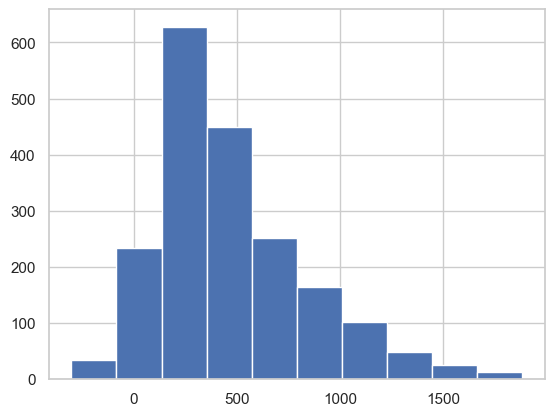

In [257]:
df_freshers_left['job_tenure_days'].hist()

Observations :  
Number of Days in job when the job is left by a fresher is following a unifrom distribution that is skewed towards right.

Text(0.5, 1.0, "Fresher's total number of days in Job when left the Job")

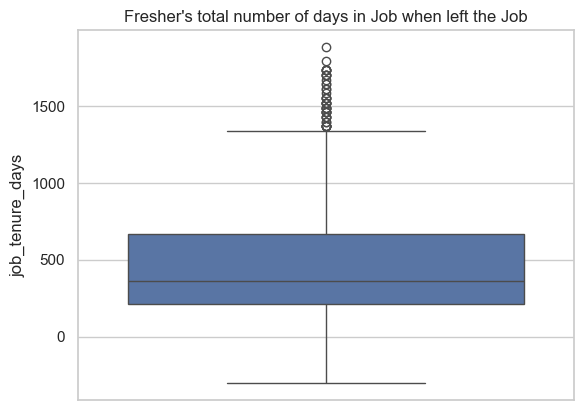

In [258]:
sns.boxplot(df_freshers_left['job_tenure_days'])
plt.title('Fresher\'s total number of days in Job when left the Job')

Observations (from above & below) :  
Average no. of days when freshers leave their job is 467 days i.e. 1 year & 3 months approx.  
25% of freshers leave their job after 212 days i.e. 7 months approx.


In [259]:
df_freshers_left['job_tenure_days'].describe()

count    1945.000000
mean      467.107455
std       364.712725
min      -303.000000
25%       212.000000
50%       365.000000
75%       669.000000
max      1885.000000
Name: job_tenure_days, dtype: float64